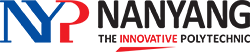

# IT3311 Assignment - Task 2: Image Classification

You are required to build an image classification model to predict the video category based its thumbnail. This analysis aims to be accompaniment to the results of the text classification and the possibilities of using the image classification results together for video category classification.

**Tasks:**

1. **Data Understanding**: Examine the dataset
2. **Data Preparation**: Prepares the data and all necessary preprocessing tasks
3. **Modelling**: Use different text representation and algorithms
4. **Evaluation**: Evaluates results from the algorithms and select the best model

**Done by: V Varsha 203011T**

## 1. Import libraries and download the packages

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16 
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import tensorflow as tf 
from tensorflow import keras
from sklearn.model_selection import cross_validate
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization

## 2. Read the dataset

Create list for each category and the channels in the category

In [2]:
comedy_channels = ["Brooklyn Nine-Nine", "DRIVETRIBE", "Incognito Mode", "Internet Historian", "Joma Tech", "Key & Peele", "OverSimplified", "Parks and Recreation", "penguinz0", "Screen Junkies", "Team Coco", "The Graham Norton Show", "The Grand Tour", "The Office", "Top Gear"]
VideoGames_channels = ["3Blue1Brown","Dr. Becky","ElectroBOOM","Kurzgesagt – In a Nutshell","Lex Clips","Mark Rober","NileRed","PBS Space Time","SEA","SmarterEveryDay","Veritasium","Vsauce"]
Food_channels = ["About To Eat","Bon Appetit","Eater","Epicurious","First We Feast","FoodTribe","Gordon Ramsay","Hell's Kitchen","Munchies","Mythical Kitchen","The F Word"]
Entertainment_channels = ["Brooklyn Nine-Nine","BuzzFeedVideo","Doctor Who","First We Feast","MrBeast","Parks and Recreation","Screen Junkies","Team Coco","The Graham Norton Show","The Office","The Try Guys"]
News_channels = ["A&E","BBC News","Insider News","NBC News","NowThis News","Sky News","SomeGoodNews","TechLinked","The Daily Show with Trevor Noah","VICE"]
Tech_channels = ["Austin Evans","Coder Coder","Fireship","Hardware Canucks","Joma Tech","Linus Tech Tips","Marques Brownlee","TechLinked","Techquickie","Web Dev Simplified"]

Create list of channels

In [3]:
channels = ['3Blue1Brown', 'A&E', 'About To Eat', 'Austin Evans', 'BBC News', 'Bon Appetit', 'Brooklyn Nine-Nine', 'BuzzFeedVideo', 'Coder Coder', 'Doctor Who', 'Dr. Becky', 'DRIVETRIBE', 'Eater', 'ElectroBOOM', 'Epicurious', 'Fireship', 'First We Feast', 'FoodTribe', 'Gordon Ramsay', 'Hardware Canucks', "Hell's Kitchen", 'Incognito Mode', 'Insider News', 'Internet Historian', 'Joma Tech', 'Key & Peele', 'Kurzgesagt ΓÇô In a Nutshell', 'Lex Clips', 'Linus Tech Tips', 'Mark Rober', 'Marques Brownlee', 'MrBeast', 'Munchies', 'Mythical Kitchen', 'NBC News', 'NileRed', 'NowThis News', 'OverSimplified', 'Parks and Recreation', 'PBS Space Time', 'penguinz0', 'Screen Junkies', 'SEA', 'Sky News', 'SmarterEveryDay', 'SomeGoodNews', 'Team Coco', 'TechLinked', 'Techquickie', 'The Daily Show with Trevor Noah', 'The F Word', 'The Graham Norton Show', 'The Grand Tour', 'The Office', 'The Try Guys', 'Top Gear', 'Veritasium', 'VICE', 'Vsauce', 'Web Dev Simplified']

Initialize empty lists

In [4]:
comedy_list = []
videogames_list = []
food_list = []
entertainment_list = []
news_list = []
tech_list = []
channel_list = []

Function to load images from folder

In [5]:
def load_images_from_folder(folder):
    images = []
    image_id_list =[]
    for root, dirs, files in os.walk(folder):
        for filename in files:
            image_id_list.append(filename)
            image = load_img(os.path.join(root,filename))
            image = img_to_array(image)
            images.append(image.flatten())
    return images,image_id_list

Create dataframe of images

In [6]:
images,image_id_list=load_images_from_folder("images")
image_array = np.array(images)
img_data = pd.DataFrame(image_array)
img_data["Id"]=image_id_list

Identify channels of images

In [7]:
for channel in channels:
        number_files = len(os.listdir("images/{}".format(channel)))
        for file in range(number_files):
            channel_list.append(channel)
            if channel in comedy_channels:
                comedy_list.append(1)
            else:
                comedy_list.append(0)

            if channel in VideoGames_channels:
                videogames_list.append(1)
            else:
                videogames_list.append(0)

            if channel in Food_channels:
                food_list.append(1)
            else:
                food_list.append(0)

            if channel in Entertainment_channels:
                entertainment_list.append(1)
            else:
                entertainment_list.append(0)

            if channel in News_channels:
                news_list.append(1)
            else:
                news_list.append(0)

            if channel in Tech_channels:
                tech_list.append(1)
            else:
                tech_list.append(0)

Combine category and channel dataframe with image datagrame

In [8]:
category_dataframe = pd.DataFrame(list(zip(comedy_list, entertainment_list,news_list,food_list,tech_list,videogames_list,channel_list)),columns =['Comedy', 'Entertainment',"News","Food","Tech","VideoGames","Channel"])

In [9]:
data = pd.concat([img_data, category_dataframe], axis=1)

In [10]:
data.head()

0    1    2    3    4    5    6    7    8    9  ...  2764798  2764799  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0      0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0      0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0      0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0      0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0      0.0   

                Id  Comedy  Entertainment  News  Food  Tech  VideoGames  \
0  3d6DsjIBzJ4.jpg       0              0     0     0     0           1   
1  aircAruvnKk.jpg       0              0     0     0     0           1   
2  bBC-nXj3Ng4.jpg       0              0     0     0     0           1   
3  CfW845LNObM.jpg       0              0     0     0     0           1   
4  d-o3eB9sfls.jpg       0              0     0     0     0           1   

       Channel  
0  3Blue1Brown  
1  3Blue1Brown  
2  3Blue1Brown  
3  3Blue1Brown  
4  3Blue1Brown  

[5 rows x 2764808 columns]

## 3. Data Understanding

### 3.1 Data Understanding - Shape of Images

In [59]:
print("The shape of the dataset is:",img_data.shape)

The shape of the dataset is: (1519, 2764801)


### 3.2 Data Understanding - Info

In [61]:
img_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Columns: 2764801 entries, 0 to Id
dtypes: float32(2764800), object(1)
memory usage: 15.6+ GB


### 3.3 Data Understanding - Channels
The highest number of videos from a channel is 30 and the lowest is 6. Most channels have at least 14 videos

In [63]:
print("No. of channels in dataset:",len(data["Channel"].value_counts()))
print("Channels & respective number of videos")
data["Channel"].value_counts()### 3.1 Data Understanding - Info

No. of channels in dataset: 60
Channels & respective number of videos


3Blue1Brown                        30
The Try Guys                       30
Parks and Recreation               30
Hell's Kitchen                     30
Key & Peele                        30
The Office                         30
The Daily Show with Trevor Noah    30
Brooklyn Nine-Nine                 30
Bon Appetit                        30
Veritasium                         30
NileRed                            29
PBS Space Time                     29
Incognito Mode                     29
Mark Rober                         29
Hardware Canucks                   29
Gordon Ramsay                      29
MrBeast                            29
Top Gear                           29
Coder Coder                        29
Epicurious                         29
Kurzgesagt ΓÇô In a Nutshell       29
The Graham Norton Show             29
Internet Historian                 29
Joma Tech                          28
A&E                                28
Team Coco                          28
ElectroBOOM 

### 3.4 Data Understanding - Category

In [70]:
print(data["Food"].value_counts())
print("\n")
print(data["Entertainment"].value_counts())
print("\n")
print(data["Comedy"].value_counts())
print("\n")
print(data["News"].value_counts())
print("\n")
print(data["VideoGames"].value_counts())
print("\n")
print(data["Tech"].value_counts())

0    1251
1     268
Name: Food, dtype: int64


0    1213
1     306
Name: Entertainment, dtype: int64


0    1111
1     408
Name: Comedy, dtype: int64


0    1299
1     220
Name: News, dtype: int64


0    1240
1     279
Name: VideoGames, dtype: int64


0    1259
1     260
Name: Tech, dtype: int64


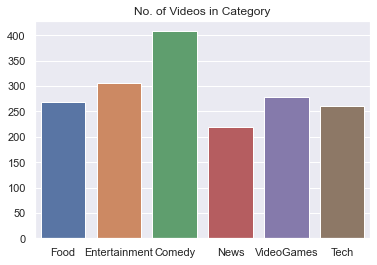

In [68]:
x = ['Food', 'Entertainment', 'Comedy',"News","VideoGames","Tech"]
y = [268,306,408,220,279,260]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x, y).set(title='No. of Videos in Category')
plt.show()

The comdey category has the highest number of videos and the news category has the least number of videos. Howver all the categories have more than 200 videos.

### 3.4 Data Understanding - Category Analysis
I will be plotting the average RGB pixel histograms 

In [12]:
# reference:https://stackoverflow.com/questions/61921718/how-to-plot-image-color-histogram
def plot_rgb_histogram(category_data,title):
    category_data = category_data.drop(['Comedy', 'Entertainment',"News","Id","VideoGames","Tech","Food","Channel"], axis=1)
    category_data= np.array(category_data)
    category_data=category_data.reshape(len(category_data),1280,720,3)
    red_pixels = []
    green_pixels = []
    blue_pixels = []
    for i in range(len(category_data)):
        img = category_data[i]
        red, green, blue = img[:,:,0], img[:,:,1], img[:,:,2]
        red_pixels.append(red.flatten())
        green_pixels.append(green.flatten())
        blue_pixels.append(blue.flatten())
    red_pixel_df = pd.DataFrame(red_pixels)
    blue_pixel_df = pd.DataFrame(blue_pixels)
    green_pixel_df = pd.DataFrame(green_pixels)
    # Overlay histograms of the pixels of each color in the bottom subplot
    plt.figure(figsize=(12, 12))
    plt.hist(red_pixel_df.mean(), bins=256, density=False, color='red', alpha=0.5)
    plt.hist(blue_pixel_df.mean(), bins=256, density=False, color='green', alpha=0.4)
    plt.hist(green_pixel_df.mean(), bins=256, density=False, color='blue', alpha=0.3)

    # set labels and ticks
    # plt.xticks(ticks=np.linspace(0, 1, 17), labels=range(0, 257, 16))

    # Cosmetics
    plt.title('Histograms from {} Category'.format(title))
    plt.ylabel('Counts')
    plt.xlabel('Intensity')

    # Display the plot
    plt.show()
    return red_pixel_df,blue_pixel_df,green_pixel_df


#### 3.4.1 Data Understanding - Comedy Category

In [14]:
comedy_data = data[data.Comedy == 1]

In [15]:
print("Comedy Images Shape:",comedy_data.shape)

Comedy Images Shape: (408, 2764808)


In [16]:
comedy_red_pixel_df,comedy_blue_pixel_df,comedy_green_pixel_df = plot_rgb_histogram(comedy_data,"Comedy")

The red pixels intensity range from 80 to 145.Hence, the red pixels are between low to medium brightness. The pixel intensity peaks in the range 122 to 135.<br>

The blue pixels intensity range from 65 to 140. Hence, the blue pixels are between low to medium brightness.The highest peak is in the range 105 to 115<br>

The green pixel intensity range from 65 to 125. Hence, the green pixels are between low to medium brightness.The highest peak is between 97 to 105.<br><br>

The green and blue pixels overlap between the pixel range 65 and 125<br>
The green and red pixels overlap between the pixel range 80 to 125 <br>
The blue and red pixels overlap between the the pixel range 80 to 140<br>
All 3 colour channels overlap between the pixel range 80 to 125<br><br>

The most dominant colour channel is blue<br>

#### 3.4.2 Data Understanding - Entertainment Category

In [19]:
ent_data = data[data.Entertainment == 1]

In [20]:
print("Entertainment Images Shape:",ent_data.shape)

Entertainment Images Shape: (306, 2764808)


In [21]:
ent_red_pixel_df,ent_blue_pixel_df,ent_green_pixel_df = plot_rgb_histogram(ent_data,"Entertainment")

The red pixels intensity range from around 90 to 180. Hence, the red pixels are between low to medium-high brightness. The pixel intensity peaks in the range 118 to 125 and 130 to 138 <br>

The green pixels intensity range from around 65 to 138. Hence, the green pixels are between low to medium brightness.The highest peak is in the range 85 to 105<br>

The blue pixel intensity range from around 70 to 165. Hence, the blue pixels are between light to medium-high brightness.The highest peak is between 90 to 110.<br><br>

The green and blue pixels overlap between the pixel range 70 and 138<br>
The green and red pixels overlap between the pixel range 90 to 138 <br>
The blue and red pixels overlap between the the pixel range 90 to 165<br>
All 3 colour channels overlap between the pixel range 90 to 138<br><br>

The most dominant colour channel is blue<br>

#### 3.4.3 Data Understanding - Food Category

In [23]:
food_data = data[data.Food == 1]

In [24]:
print("Entertainment Images Shape:",food_data.shape)

Entertainment Images Shape: (268, 2764808)


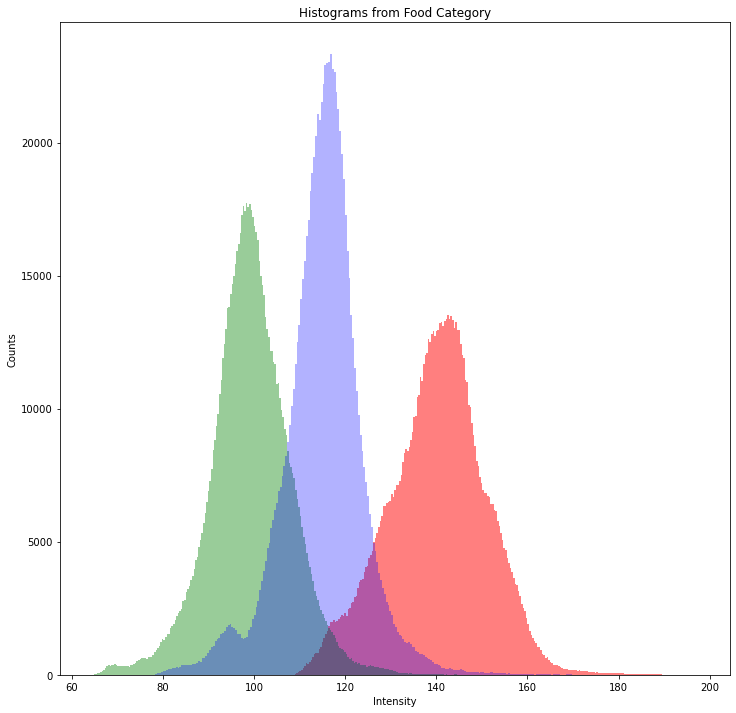

In [25]:
food_red_pixel_df,food_blue_pixel_df,food_green_pixel_df = plot_rgb_histogram(food_data,"Food")

The red pixels intensity range from around 110 to 195. Hence, the red pixels are between medium-high brightness. The pixel intensity peaks in the range 135 to 157 <br>

The green pixels intensity range from around 65 to 150. Hence, the green pixels are between low to medium brightness.The highest peak is in the range 85 to 110<br>

The blue pixel intensity range from around 78 to 183. Hence, the blue pixels are between low to medium - high brightness.The highest peak is between 105 to 125.<br><br>

The green and blue pixels overlap between the pixel range 78 and 150<br>
The green and red pixels overlap between the pixel range 110 to 150 <br>
The blue and red pixels overlap between the the pixel range 110 to 183<br>
All 3 colour channels overlap between the pixel range 110 to 150 <br><br>

The most dominant colour channel is blue. However, all 3 colour have distinct pixel intensities they dominate as we can clearly see 3 different colour peaks<br>

#### 3.4.4 Data Understanding - Video Games Category

In [27]:
games_data = data[data.VideoGames == 1]

In [28]:
print("Video Games Images Shape:",games_data.shape)

Video Games Images Shape: (279, 2764808)


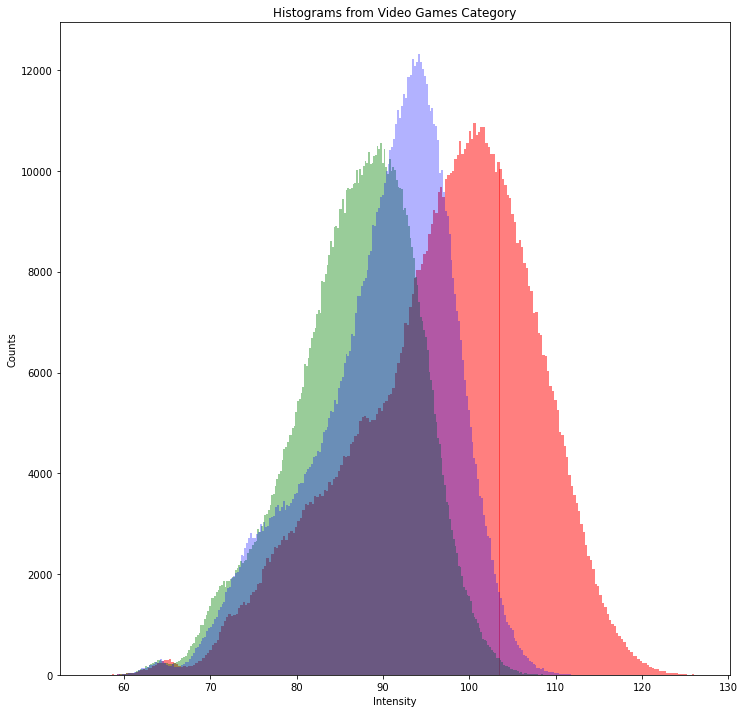

In [29]:
games_red_pixel_df,games_blue_pixel_df,games_green_pixel_df = plot_rgb_histogram(games_data,"Video Games")

The red pixels intensity range from around 55 to 125. Hence, the red pixels are between low to medium brightness. The pixel intensity peaks in the range 95 to 105 <br>

The green pixels intensity range from around 55 to 108. Hence, the green pixels are between low to medium brightness.The highest peak is in the range 85 to 110<br>

The blue pixel intensity range from around 55 to 115. Hence, the blue pixels are between low to medium brightness.The highest peak is between 85 to 105.<br><br>

The green and blue pixels overlap between the pixel range 55 and 115. Hence all the blue pixels overlap with the green pixels<br>

The green and red pixels overlap between the pixel range 55 to 108. Hence, all the green pixels overlap with the red pixels<br>

The blue and red pixels overlap between the the pixel range 55 to 115. Hence, all the blue pixels overlap with the red <br>
All 3 colour channels overlap between the pixel range 110 to 150 <br><br>

The most dominant colour channel is red. However, there are many overlaps <br>

#### 3.4.5 Data Understanding - Tech Category

In [31]:
tech_data = data[data.Tech == 1]

In [32]:
print("Tech Images Shape:",tech_data.shape)

Tech Images Shape: (260, 2764808)


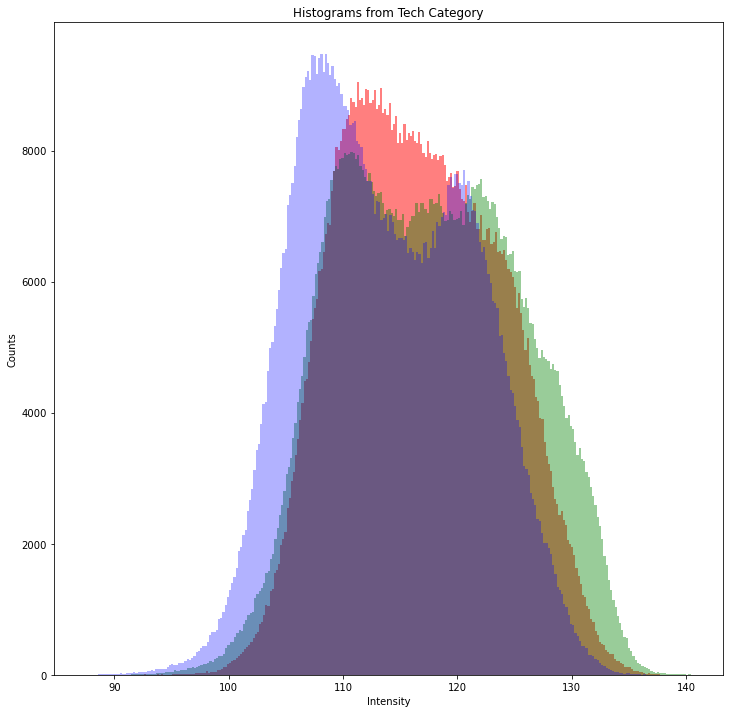

In [33]:
tech_red_pixel_df,tech_blue_pixel_df,tech_green_pixel_df = plot_rgb_histogram(tech_data,"Tech")

The red pixels intensity range from around 90 to 140. Hence, the red pixels are between low to medium brightness. The pixel intensity peaks in the range 105 to 125 <br>

The green pixels intensity range from around 90 to 140. Hence, the green pixels are between low to medium brightness.The highest peak is in the range 108 to 125 and  <br>

The blue pixel intensity range from around 55 to 115. Hence, the blue pixels are between low to medium brightness.The highest peak is between 105 to 115.<br><br>

The green and red pixels overlap between the pixel range 90 and 140. Hence all the green pixels and red pixels are overlapping<br>

The green and blue pixels overlap between the pixel range 90 to 115.<br>

The blue and red pixels overlap between the the pixel range 90 to 115. <br><br>

The most dominant colour channel is blue. However, there are many overlaps <br>

#### 3.4.6 Data Understanding - News Category

In [35]:
news_data = data[data.News == 1]

In [36]:
print("News Images Shape:",news_data.shape)

News Images Shape: (220, 2764808)


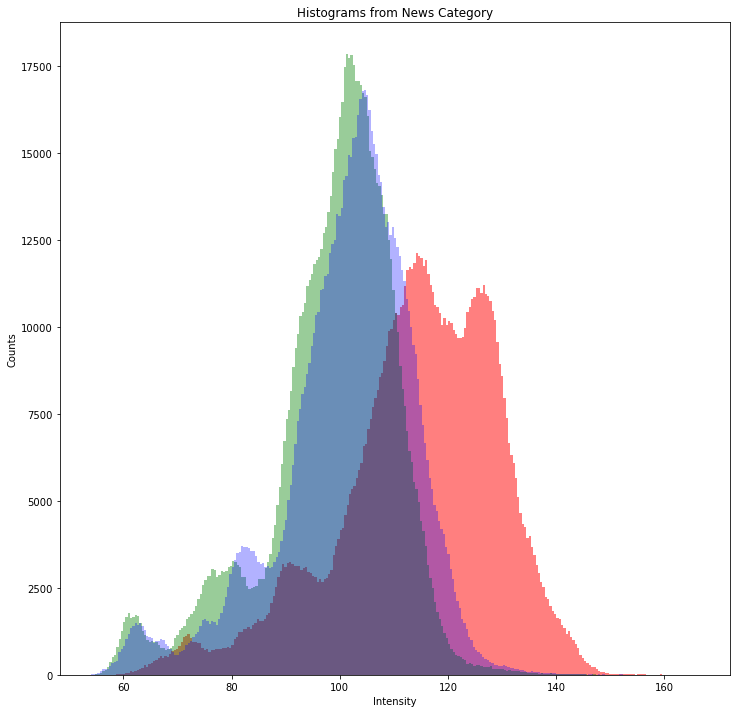

In [37]:
news_red_pixel_df,news_blue_pixel_df,news_green_pixel_df = plot_rgb_histogram(news_data,"News")

The red pixels intensity range from around 55 to 165. Hence, the red pixels are between low to medium-high brightness. The pixel intensity peaks in the range 115 to 138 <br>

The green pixels intensity range from around 55 to 165. Hence, the green pixels are between low to medium-high brightness.The highest peak is in the range 95 to 125 and  <br>

The blue pixel intensity range from around 55 to 165. Hence, the blue pixels are between low to medium brightness.The highest peak is between 95 to 125.<br><br>

Hence all the pixel values are in the same range. However, the counts of the pixels are different.Hence, we can see the distinct histograms. <br><br>

All 3 histograms overlap greatly between 60 to 140 <br><br>

The most dominant colour channel is green. However, there are many overlaps <br>

### 3.5 Summary

Each category has unique RGB histograms. Hence, the RGB colours would be useful in predicting the categories. 

## 4. Data Preparation + Modelling

When testing out the preprocessing and models, I realised that the preprocessing steps greatly affect the results of the model. This is because, the preprocessing steps changes the pixels significantly. Thus, it affects the models ability to effectively recognize patterns in the image due to certain image processing steps. Hence, it is unable to generealize well on unseen data. Thus, I will perform modelling and data prepration concurrently to identify which preprocessing steps will improve the models' performance. 

### 4.1 Evaluvation Functions

In [13]:
def evaluvate_model(model,X_test,y_test,model_name):
    model_predictions=model.predict(X_test)
    print("---------------------{} Classification Report--------------------- \n".format(model_name))
    print(classification_report(y_test,model_predictions)) 

In [14]:
kfolds = KFold(n_splits=10, random_state=42, shuffle=True)
def cross_validate_model(model,X,y,model_name):
    cross_validated_score=cross_validate(model, X, y, cv=kfolds, scoring=('f1_weighted','recall_weighted','precision_weighted','accuracy'))#cross validate f1-score
    print("{} Mean Cross Validation F1-Score:{}{}".format(model_name,round(cross_validated_score['test_f1_weighted'].mean()*100,3),"%"))
    print("{} Mean Cross Validation Recall:{}{}".format(model_name,round(cross_validated_score['test_recall_weighted'].mean()*100,3),"%"))
    print("{} Mean Cross Validation Precision:{}{}".format(model_name,round(cross_validated_score['test_precision_weighted'].mean()*100,3),"%"))
    print("{} Mean Cross Validation Accuracy:{}{}".format(model_name,round(cross_validated_score["test_accuracy"].mean()*100,3),"%"))

Cross-Validation is one of the most efficient ways of interpreting the model performance. It ensures that the model accurately fits the data and also checks for any overfitting. It is the process of assessing how the results of a model will generalize on unseen data. The kfold I chose was 10. Hence,the fitting procedure will be performed a total of ten times, with each fit being performed on a training set consisting of 90% of the total training set selected at random, with the remaining 10% used as a hold out set for validation.

source: https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

The kcross validation is performed for f1_weighted, recall_weighted, precision_weighted and accracy score. The "weighted" is used the dataset is unbalanced. The f1/recall/precision weighted-averaged score is calculated by taking the mean of all per-class F1/recall/precision scores while considering each class's support. Support refers to the number of actual occurrences of the class in the dataset.

Source: https://www.researchgate.net/post/What-does-ten-times-ten-fold-cross-validation-of-data-set-mean-and-its-importance

In classification problems, the most important metrics are the precision,recall and f1-score. 
<ul>
    <li>Precision - A measure of how many of the positive predictions made are correctly </li>
    <li> Recall - A measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. </li>
    <li> F1-score - A measure combining both precision and recall. It is generally described as the harmonic mean of the two. </li>
    </ul>
  
Hence, I will be using these metrics as well as the classification report to evaluvate and compare the performance of the different  model

### 4.2 Models

As this is a multi output classification problem, I have used the "MultiOutput Classifier" and indicated the models in the estimator hyper parameter. This enables the fitting of one classifier per target. It is a simple strategy for extending classifiers that do not natively support multi-target classification

In [48]:
lrc = MultiOutputClassifier(estimator=LogisticRegression(n_jobs=-1))
svc = MultiOutputClassifier(estimator=SVC())
adb = MultiOutputClassifier(estimator=AdaBoostClassifier())

The models used for the text classification are:
<ol>
    <li> <b>Ada Boost</b> AdaBoost is an ensemble learning method. It uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.The weak learners in AdaBoost are decision trees with a single split, called decision stumps. AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well. In image classification, Adaboost works effectively for facial recognition due to the way the algorithm works. Hence, it is likely to perform well on classification tasks as well.There are also many research papers on using Ada Boost for image related problems. Thus, I will be experimenting on the use of Ada Boost for image classification in this assignment. </li><br><br>
    
    
<li><b>Support Vector Machine</b> determines the best decision boundary between vectors that belong to a category and vectors that do not belong. Although it is originally for binary classification, it can be adapted to handle multi class classification. SVM separates labelled training data via a hyperplane that is maximally distant from the different categories.This optimally separating hyperplane in the feature space corresponds to a nonlinear decision boundary in the input space. The idea is, the data may not be linearly separable in our ‘n’ dimensional space but may be linearly separable in a higher dimensional space. Hence, it is able to work well with high dimensional image data. <br><br> Scikit learn offers 2 types of SVC algorithms: the regular SVC and Linear SVC. <br><br>I have chosen to use SVC. The Linear SVC algorithm is similar to the SVC algorithm but its its kernel parameter as "linear". Hence, during the hyper paramtere tuning I will be tuning to identify the best kernel for the SVC model. Thus, I will use the regular SVC first.<br><br></li>
     
<li><b> Logistic Regression </b> uses the weighted combination of the input features and passes them through a sigmoid function. Although it is for binary classfication, it can be adapted to suport multi class classification. Hence, for multi class classification it would use a softmax function instead of sigmoid. Furthermore, logistic regression is discriminatory. This means the algorithm is actually learning how to distinguish the classes from each other. Thus, it is great for image classification. It is also efficient which is necessary when dealing with high dimensional data. </li><br>
 


References: 
https://betterprogramming.pub/na%C3%AFve-bayes-vs-svm-for-image-classification-75c16b29a96d
https://monkeylearn.com/text-classification-support-vector-machines-svm/
https://www.tutorialspoint.com/scikit_learn/scikit_learn_support_vector_machines.htm
https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe
https://blog.paperspace.com/adaboost-optimizer/
https://towardsdatascience.com/the-perfect-recipe-for-classification-using-logistic-regression-f8648e267592#:~:text=Advantages%20of%20Logistic%20Regression&text=Logistic%20regression%20is%20easier%20to,as%20indicators%20of%20feature%20importance.
https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2#:~:text=The%20main%20advantage%20of%20CNN,CNN%20is%20also%20computationally%20efficient.

In [11]:
def preprocess_data(images):
    images_array = np.array(images)
    images_df = pd.DataFrame(images_array)
    data = pd.concat([images_df, category_dataframe], axis=1)
    X = data.iloc[:,:-7]
    X = X / 255
    y = category_dataframe[["Food","Entertainment","Comedy","News","VideoGames","Tech"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    pca = PCA()
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X,y,X_train_pca,X_test_pca,y_train,y_test

In [12]:
def visualize_images(images,title):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    fig.suptitle(("{} Images").format(title),fontsize=16)
    for i in range(21):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images.iloc[i].values.reshape(256,256,3)) 
    plt.show()

### 4.3 Resize Images

Although the images came in the same size, it is too big and would require long time to train and resources such as memory. However, resizing the image would cause the image to lose information. Hence, I chose 256x256 as it is able to achieve a balance  between the capacity of my computer to handle the images as well as the quality of the image.

#### Resize Images - width = 256, height = 256

In [79]:
def resize_image(image_array,width,height):
    resized_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (width,height))
        resized_images.append(image.flatten())
    X,y,X_train, X_test, y_train, y_test = preprocess_data(resized_images)
    return X,y,X_train, X_test, y_train, y_test

In [80]:
X_resize, y_resize, X_train_resize, X_test_resize, y_train_resize, y_test_resize= resize_image(image_array,256,256)

In [213]:
visualize_images(X_resize[100:122],"Resized")

##### Logistic Regression

In [85]:
lrc.fit(X_train_resize, y_train_resize)
evaluvate_model(lrc,X_test_resize,y_test_resize,"Resize  (256,256) & Logistic Regression")

---------------------Resize (256,256) & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.54      0.62      0.58        79
           1       0.46      0.70      0.55       101
           2       0.52      0.63      0.57       123
           3       0.46      0.84      0.59        75
           4       0.29      0.59      0.39        83
           5       0.27      0.64      0.38        72

   micro avg       0.41      0.67      0.51       533
   macro avg       0.42      0.67      0.51       533
weighted avg       0.43      0.67      0.52       533
 samples avg       0.43      0.65      0.49       533



##### Support Vector Machine

In [144]:
svc.fit(X_train_resize, y_train_resize)
evaluvate_model(svc,X_test_resize,y_test_resize,"Resize = (256,256) & SVC")

---------------------Resize = (256,256) & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.96      0.29      0.45        79
           1       1.00      0.27      0.42       101
           2       0.95      0.17      0.29       123
           3       1.00      0.17      0.30        75
           4       0.57      0.10      0.16        83
           5       1.00      0.03      0.05        72

   micro avg       0.92      0.18      0.30       533
   macro avg       0.91      0.17      0.28       533
weighted avg       0.92      0.18      0.29       533
 samples avg       0.15      0.15      0.15       533



##### Ada Boost Classifer

In [147]:
adb.fit(X_train_resize, y_train_resize)
evaluvate_model(adb,X_test_resize,y_test_resize,"Resize = (256,256) & Ada Boost Classifier")

---------------------Resize = (256,256) & Ada Boost Classifier Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.64      0.29      0.40        79
           1       0.47      0.36      0.40       101
           2       0.41      0.13      0.20       123
           3       0.20      0.25      0.22        75
           4       0.33      0.06      0.10        83
           5       0.36      0.12      0.19        72

   micro avg       0.38      0.20      0.26       533
   macro avg       0.40      0.20      0.25       533
weighted avg       0.41      0.20      0.25       533
 samples avg       0.20      0.18      0.18       533



#### 4.3.1 Summary of Results

This result will be the base model result for the upcoming impage preprocessing steps

<table>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 51% </td>

</tr>
<tr>
<td> SVC </td>
<td> 29% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 25% </td>
</tr>
</table>

### 4.4 Gamma Correction

Gamma correction is also known as the Power Law Transform. It is a nonlinear adaptation applied to each and every pixel value of images. Hence, it remodels the saturation of the image. Gamma values < 1 will darken the image while gamma > 1 will make the image appear lighter. In our dataset, there are many darker images. Hence, I will increase the gamma by 0.1 and see how this affects the models' performance

#### Gamma = 1.1

In [148]:
if not os.path.exists("cleaned_images"):
    os.makedirs('cleaned_images')

def gamma_image(gamma):
    gamma_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, gamma)
        gamma_images.append(image.flatten())
    X,y,X_train, X_test, y_train, y_test = preprocess_data(gamma_images)
    return X,y,X_train, X_test, y_train, y_test

In [149]:
X_gamma1,y_gamma1,X_train_gamma1, X_test_gamma1, y_train_gamma1, y_test_gamma1 = gamma_image(1.1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

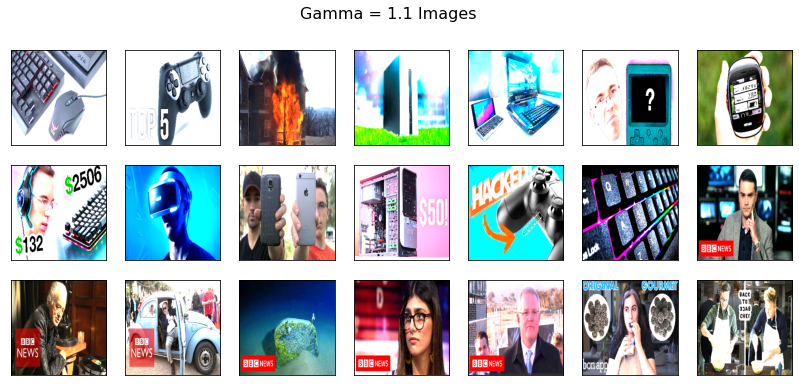

In [217]:
visualize_images(X_gamma1[100:122],"Gamma = 1.1")

##### Logistic Regression

In [150]:
lrc.fit(X_train_gamma1,  y_train_gamma1)
evaluvate_model(lrc,X_test_gamma1,y_test_gamma1,"Gamma = 1.1 & Logistic Regression")

---------------------Gamma = 1.1 & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.51      0.62      0.56        79
           1       0.46      0.69      0.55       101
           2       0.57      0.59      0.58       123
           3       0.46      0.84      0.60        75
           4       0.30      0.60      0.40        83
           5       0.26      0.64      0.37        72

   micro avg       0.41      0.66      0.51       533
   macro avg       0.43      0.66      0.51       533
weighted avg       0.44      0.66      0.52       533
 samples avg       0.43      0.64      0.49       533



##### Support Vector Machine

In [151]:
svc.fit(X_train_gamma1,  y_train_gamma1)
evaluvate_model(svc,X_test_gamma1,y_test_gamma1,"Gamma = 1.1 & SVC")

---------------------Gamma = 1.1 & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.96      0.30      0.46        79
           1       1.00      0.28      0.43       101
           2       0.95      0.17      0.29       123
           3       1.00      0.16      0.28        75
           4       0.57      0.10      0.16        83
           5       1.00      0.03      0.05        72

   micro avg       0.92      0.18      0.30       533
   macro avg       0.91      0.17      0.28       533
weighted avg       0.92      0.18      0.29       533
 samples avg       0.15      0.15      0.15       533



#####  Ada Boost

In [152]:
adb.fit(X_train_gamma1,  y_train_gamma1)
evaluvate_model(adb,X_test_gamma1,y_test_gamma1,"Gamma = 1.1 & Ada Boost")

---------------------Gamma = 1.1 & Ada Boost Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.72      0.27      0.39        79
           1       0.37      0.41      0.39       101
           2       0.28      0.20      0.23       123
           3       0.31      0.31      0.31        75
           4       0.27      0.18      0.22        83
           5       0.23      0.18      0.20        72

   micro avg       0.33      0.26      0.29       533
   macro avg       0.36      0.26      0.29       533
weighted avg       0.36      0.26      0.29       533
 samples avg       0.22      0.24      0.22       533



<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Before Gamma is Applied </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 52% </td>

</tr>
<tr>
<td> SVC </td>
<td> 29% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 25% </td>
</tr>
</table>


<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> After Gamma is Applied </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 52% </td>

</tr>
<tr>
<td> SVC </td>
<td> 29% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 29% </td>
</tr>
</table>

The performance of logistic regression and SVC remained the same after Gamma was applied. However, the weighted f1-score in Ada Boost improved by 4%. Hence, I will continue to explore if increasing gamma will further increase the performance of the models

#### Gamma = 1.2

In [153]:
X_gamma2,y_gamma2,X_train_gamma2, X_test_gamma2, y_train_gamma2, y_test_gamma2 = gamma_image(1.2)

In [218]:
visualize_images(X_gamma2[100:122],"Gamma = 1.2")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

##### Logistic Regression

In [154]:
lrc.fit(X_train_gamma2,  y_train_gamma2)
evaluvate_model(lrc,X_test_gamma2,y_test_gamma2,"Gamma = 1.2 & Logistic Regression")

---------------------Gamma = 1.2 & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.46      0.72      0.56        79
           1       0.43      0.70      0.54       101
           2       0.50      0.63      0.56       123
           3       0.39      0.85      0.53        75
           4       0.29      0.66      0.40        83
           5       0.25      0.68      0.37        72

   micro avg       0.38      0.70      0.49       533
   macro avg       0.39      0.71      0.49       533
weighted avg       0.40      0.70      0.50       533
 samples avg       0.42      0.68      0.49       533



##### Support Vector Machine

In [155]:
svc.fit(X_train_gamma2,  y_train_gamma2)
evaluvate_model(svc,X_test_gamma2,y_test_gamma2,"Gamma = 1.2 & SVC")

---------------------Gamma = 1.2 & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.96      0.32      0.48        79
           1       1.00      0.29      0.45       101
           2       0.95      0.17      0.29       123
           3       1.00      0.16      0.28        75
           4       0.57      0.10      0.16        83
           5       1.00      0.03      0.05        72

   micro avg       0.92      0.18      0.30       533
   macro avg       0.91      0.18      0.28       533
weighted avg       0.92      0.18      0.29       533
 samples avg       0.16      0.15      0.15       533



#####  Ada Boost

In [156]:
adb.fit(X_train_gamma2,  y_train_gamma2)
evaluvate_model(adb,X_test_gamma2,y_test_gamma2,"Gamma = 1.2 & Ada Boost")

---------------------Gamma = 1.2 & Ada Boost Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.61      0.32      0.42        79
           1       0.38      0.51      0.44       101
           2       0.28      0.23      0.25       123
           3       0.26      0.27      0.26        75
           4       0.43      0.14      0.22        83
           5       0.23      0.08      0.12        72

   micro avg       0.35      0.27      0.30       533
   macro avg       0.36      0.26      0.28       533
weighted avg       0.36      0.27      0.29       533
 samples avg       0.23      0.25      0.23       533



#### Gamma = 1.3

In [157]:
X_gamma3,y_gamma3,X_train_gamma3, X_test_gamma3, y_train_gamma3, y_test_gamma3 = gamma_image(1.3)

In [219]:
visualize_images(X_gamma3[100:122],"Gamma = 1.3")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

##### Logistic Regression

In [158]:
lrc.fit(X_train_gamma3,  y_train_gamma3)
evaluvate_model(lrc,X_test_gamma3,y_test_gamma3,"Gamma = 1.3 & Logistic Regression")

---------------------Gamma = 1.3 & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.45      0.72      0.55        79
           1       0.43      0.72      0.54       101
           2       0.50      0.63      0.56       123
           3       0.37      0.85      0.52        75
           4       0.28      0.66      0.40        83
           5       0.24      0.65      0.35        72

   micro avg       0.37      0.70      0.48       533
   macro avg       0.38      0.71      0.49       533
weighted avg       0.39      0.70      0.49       533
 samples avg       0.41      0.68      0.48       533



##### Support Vector Machine

In [159]:
svc.fit(X_train_gamma3,  y_train_gamma3)
evaluvate_model(svc,X_test_gamma3,y_test_gamma3,"Gamma = 1.3 & SVC")

---------------------Gamma = 1.3 & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.96      0.33      0.49        79
           1       1.00      0.29      0.45       101
           2       0.95      0.17      0.29       123
           3       1.00      0.16      0.28        75
           4       0.57      0.10      0.16        83
           5       1.00      0.04      0.08        72

   micro avg       0.93      0.19      0.31       533
   macro avg       0.91      0.18      0.29       533
weighted avg       0.92      0.19      0.30       533
 samples avg       0.16      0.16      0.16       533



#####  Ada Boost

In [160]:
adb.fit(X_train_gamma3,  y_train_gamma3)
evaluvate_model(adb,X_test_gamma3,y_test_gamma3,"Gamma = 1.3 & Ada Boost")

---------------------Gamma = 1.3 & Ada Boost Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.65      0.35      0.46        79
           1       0.41      0.33      0.36       101
           2       0.46      0.47      0.46       123
           3       0.32      0.40      0.36        75
           4       0.46      0.13      0.21        83
           5       0.31      0.11      0.16        72

   micro avg       0.43      0.32      0.36       533
   macro avg       0.43      0.30      0.34       533
weighted avg       0.44      0.32      0.35       533
 samples avg       0.27      0.29      0.27       533



#### 4.4.1 Gamma Correction - Comparison

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Gamma = 1.1 </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 52% </td>

</tr>
<tr>
<td> SVC </td>
<td> 29% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 29% </td>
</tr>
</table>

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Gamma = 1.2 </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 50% </td>

</tr>
<tr>
<td> SVC </td>
<td> 29% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 29% </td>
</tr>
</table>

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Gamma = 1.3 </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 50% </td>

</tr>
<tr>
<td> SVC </td>
<td> 29% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 28% </td>
</tr>
</table>

The weighted f1 score of the models is best on gamma = 1.1. Thus, I will continue to use this value

### 4.4 Blurring 
Blurring (smoothing) is the commonly used image processing operation for reducing the image noise. The process removes high-frequency content, like edges, from the image and makes it smooth.

#### 4.4.1 Average Blur
This is done by convolving an image with a normalized box filter. It takes the average of all the pixels under the kernel area and replaces the central element.

In [161]:
def ave_blur_image():
    ave_blur_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, 1.1)
        image = cv2.blur(image,ksize=(5,5))
        ave_blur_images.append(image.flatten())
    X,y,X_train, X_test, y_train, y_test = preprocess_data(ave_blur_images)
    return X,y,X_train, X_test, y_train, y_test

In [162]:
X_ave_blur,y_ave_blur,X_train_ave_blur, X_test_ave_blur, y_train_ave_blur, y_test_ave_blur = ave_blur_image()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

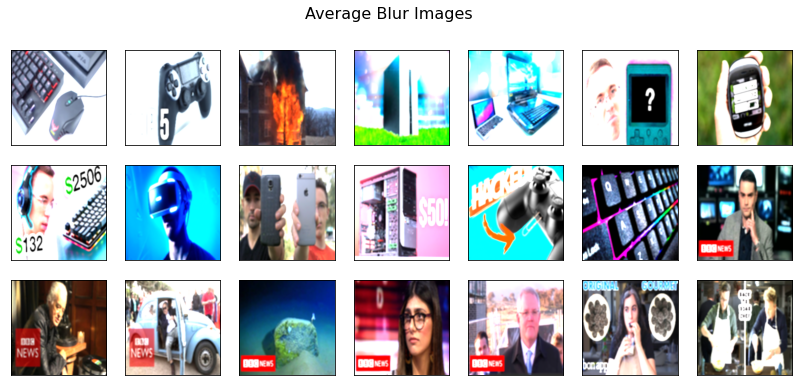

In [222]:
visualize_images(X_ave_blur[100:122],"Average Blur")

##### Logistic Regression

In [163]:
lrc.fit(X_train_ave_blur,  y_train_ave_blur)
evaluvate_model(lrc,X_test_ave_blur,y_test_ave_blur,"Average blur & Logistic Regression")

---------------------Average blur & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.38      0.65      0.48        79
           1       0.41      0.71      0.52       101
           2       0.45      0.65      0.53       123
           3       0.37      0.79      0.50        75
           4       0.30      0.61      0.40        83
           5       0.24      0.56      0.34        72

   micro avg       0.36      0.66      0.47       533
   macro avg       0.36      0.66      0.46       533
weighted avg       0.37      0.66      0.47       533
 samples avg       0.38      0.64      0.46       533



##### Support Vector Machine

In [164]:
svc.fit(X_train_ave_blur,  y_train_ave_blur)
evaluvate_model(svc,X_test_ave_blur,y_test_ave_blur,"Average blur & SVC")

---------------------Average blur & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.95      0.24      0.38        79
           1       1.00      0.20      0.33       101
           2       0.94      0.14      0.24       123
           3       1.00      0.05      0.10        75
           4       0.60      0.11      0.18        83
           5       1.00      0.04      0.08        72

   micro avg       0.90      0.14      0.23       533
   macro avg       0.92      0.13      0.22       533
weighted avg       0.92      0.14      0.23       533
 samples avg       0.12      0.11      0.11       533



##### Ada Boost Classifier

In [165]:
adb.fit(X_train_ave_blur,  y_train_ave_blur)
evaluvate_model(adb,X_test_ave_blur,y_test_ave_blur,"Average blur & SVC")

---------------------Average blur & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.53      0.22      0.31        79
           1       0.45      0.35      0.39       101
           2       0.40      0.28      0.33       123
           3       0.49      0.27      0.34        75
           4       0.34      0.12      0.18        83
           5       0.27      0.15      0.19        72

   micro avg       0.41      0.24      0.30       533
   macro avg       0.41      0.23      0.29       533
weighted avg       0.41      0.24      0.30       533
 samples avg       0.21      0.22      0.21       533



#### 4.4.2 Median Blur
The central element of the image is replaced by the median of all the pixels in the kernel area. This operation processes the edges while removing the noise.

In [166]:
def median_blur_image():
    median_blur_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, 1.1)
        image = cv2.medianBlur(image,5)
        median_blur_images.append(image.flatten())
    X,y,X_train, X_test, y_train, y_test = preprocess_data(median_blur_images)
    return X,y,X_train, X_test, y_train, y_test

In [167]:
X_median_blur,y_median_blur,X_train_median_blur, X_test_median_blur, y_train_median_blur, y_test_median_blur = median_blur_image()

In [223]:
visualize_images(X_median_blur[100:122],"Median Blur")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

##### Logistic Regression

In [168]:
lrc.fit(X_train_median_blur,  y_train_median_blur)
evaluvate_model(lrc,X_test_median_blur,y_test_median_blur,"Median blur & Logistic Regression")

---------------------Median blur & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.44      0.66      0.53        79
           1       0.42      0.70      0.53       101
           2       0.50      0.64      0.56       123
           3       0.40      0.79      0.53        75
           4       0.30      0.63      0.41        83
           5       0.25      0.61      0.36        72

   micro avg       0.38      0.67      0.48       533
   macro avg       0.39      0.67      0.48       533
weighted avg       0.40      0.67      0.49       533
 samples avg       0.42      0.65      0.48       533



##### SVC

In [169]:
svc.fit(X_train_median_blur,  y_train_median_blur)
evaluvate_model(svc,X_test_median_blur,y_test_median_blur,"Median blur & SVC")

---------------------Median blur & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.95      0.27      0.42        79
           1       1.00      0.24      0.38       101
           2       0.95      0.15      0.27       123
           3       1.00      0.12      0.21        75
           4       0.62      0.12      0.20        83
           5       1.00      0.03      0.05        72

   micro avg       0.91      0.16      0.27       533
   macro avg       0.92      0.15      0.26       533
weighted avg       0.92      0.16      0.26       533
 samples avg       0.14      0.13      0.13       533



##### Ada Boost

In [170]:
adb.fit(X_train_median_blur,  y_train_median_blur)
evaluvate_model(adb,X_test_median_blur,y_test_median_blur,"Median blur & Ada Boost Classifier")

---------------------Median blur & Ada Boost Classifier Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.44      0.27      0.33        79
           1       0.53      0.38      0.44       101
           2       0.46      0.29      0.36       123
           3       0.37      0.23      0.28        75
           4       0.48      0.12      0.19        83
           5       0.24      0.08      0.12        72

   micro avg       0.44      0.24      0.31       533
   macro avg       0.42      0.23      0.29       533
weighted avg       0.43      0.24      0.30       533
 samples avg       0.21      0.22      0.21       533



#### 4.4.3 Bilateral Filtering
The bilateral filter is used for smoothening images and reducing noise, while preserving edges. It is more effective than using a meadian filter and averaging as it those convolutions often result in a loss of important edge information, since they blur out everything, irrespective of it being noise or an edge.

In [25]:
def bilateral_filter_image():
    bilateral_filter_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, 1.1)
        image = cv2.bilateralFilter(image,9,75,75)
        bilateral_filter_images.append(image.flatten())
    X,y,X_train, X_test, y_train, y_test = preprocess_data(bilateral_filter_images)
    return X,y,X_train, X_test, y_train, y_test

In [26]:
X_bilateral_blur,y_bilateral_blur,X_train_bilateral_blur, X_test_bilateral_blur, y_train_bilateral_blur, y_test_bilateral_blur = bilateral_filter_image()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

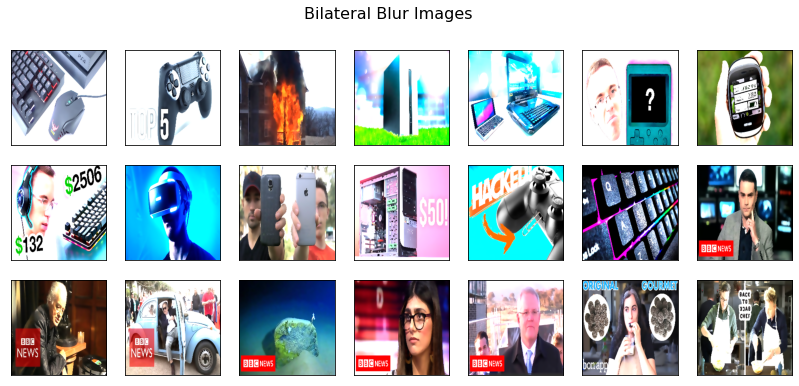

In [224]:
visualize_images(X_bilateral_blur[100:122],"Bilateral Blur")

##### Logistic Regression

In [81]:
lrc.fit(X_train_bilateral_blur,  y_train_bilateral_blur)
evaluvate_model(lrc,X_test_bilateral_blur,y_test_bilateral_blur,"Bilateral blur & Logistic Regression")

---------------------Bilateral Filter & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.85      0.49      0.62        79
           1       0.70      0.54      0.61       101
           2       0.70      0.52      0.60       123
           3       0.83      0.52      0.64        75
           4       0.52      0.34      0.41        83
           5       0.42      0.31      0.35        72

   micro avg       0.67      0.46      0.55       533
   macro avg       0.67      0.45      0.54       533
weighted avg       0.67      0.46      0.55       533
 samples avg       0.42      0.43      0.42       533



##### SVC

In [24]:
svc.fit(X_train_bilateral_blur,  y_train_bilateral_blur)
evaluvate_model(svc,X_test_bilateral_blur,y_test_bilateral_blur,"Bilateral blur & SVC")

---------------------Bilateral blur & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        79
           1       1.00      0.43      0.60       101
           2       1.00      0.33      0.49       123
           3       1.00      0.32      0.48        75
           4       0.00      0.00      0.00        83
           5       0.00      0.00      0.00        72

   micro avg       1.00      0.26      0.41       533
   macro avg       0.67      0.24      0.35       533
weighted avg       0.71      0.26      0.38       533
 samples avg       0.21      0.21      0.21       533



##### Ada Boost Classifier

In [23]:
adb.fit(X_train_bilateral_blur,  y_train_bilateral_blur)
evaluvate_model(adb,X_test_bilateral_blur,y_test_bilateral_blur,"Bilateral blur & Ada Boost")

---------------------Bilateral blur & Ada Boost Classifier Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.93      0.35      0.51        79
           1       0.46      0.42      0.44       101
           2       0.58      0.33      0.42       123
           3       0.76      0.37      0.50        75
           4       0.35      0.20      0.26        83
           5       0.20      0.17      0.18        72

   micro avg       0.50      0.32      0.39       533
   macro avg       0.55      0.31      0.39       533
weighted avg       0.55      0.32      0.39       533
 samples avg       0.28      0.28      0.27       533



#####  Ada Boost

#### 4.4.4 Blur Filters - Comparison

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Current Best Result </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 52% </td>
</tr>
<tr>
<td> SVC </td>
<td> 29% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 29% </td>
</tr>
</table>
    
<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Average Blur </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 47% </td>

</tr>
<tr>
<td> SVC </td>
<td> 23% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 21% </td>
</tr>
</table>

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Median Blur </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 49% </td>

</tr>
<tr>
<td> SVC </td>
<td> 26% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 30% </td>
</tr>
</table>

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Bilateral Filtering </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 55% </td>

</tr>
<tr>
<td> SVC </td>
<td> 38% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 39% </td>
</tr>
</table>

The performance of all 3 models is the best when using Bilateral Filter. Furthermore, the performance of logistic regression significantly improved as the f1 score increased from 52% to 55%. The f1 score of svc increased by 15% to 38%. The f1 score on ada boost increased significantly by 9% to 39%. Hence, I will use Bilateral Filter in the preprocessing steps. 

### 4.5 Morpohloigcal Operations 
Morphological operations are a set of operations that process images based on shapes. They apply a structuring element to an input image and generate an output image.

Reference: https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/

#### 4.5.1 Erosion
Erosion removes pixels on object boundaries.The value of the output pixel is the minimum value of all the pixels in the neighborhood. A pixel is set to 0 if any of the neighboring pixels have the value 0.

In [178]:
def erosion_image():
    erosion_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, 1.1)
        image = cv2.bilateralFilter(image,9,75,75)
        kernel = np.ones((5,5), np.uint8)
        image = cv2.erode(image, kernel, iterations=1)
        erosion_images.append(image.flatten())
    X,y,X_train, X_test, y_train, y_test = preprocess_data(erosion_images)
    return X,y,X_train, X_test, y_train, y_test

In [179]:
X_erosion,y_erosion,X_train_erosion, X_test_erosion, y_train_erosion, y_test_erosion = erosion_image()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

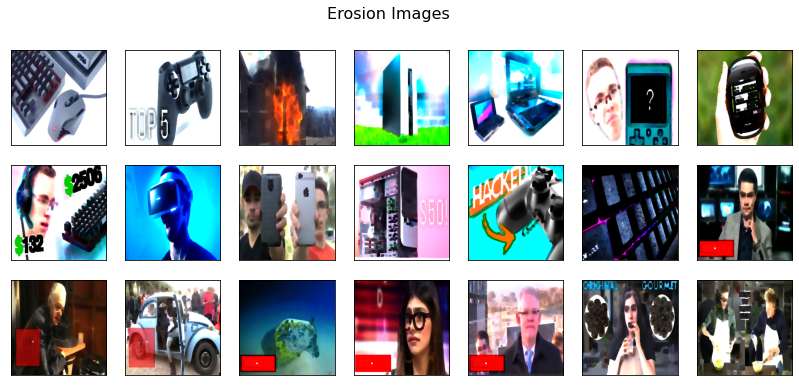

In [225]:
visualize_images(X_erosion[100:122],"Erosion")

##### Logistic Regression

In [182]:
lrc.fit(X_train_erosion,  y_train_erosion)
evaluvate_model(lrc,X_test_erosion,y_test_erosion,"Erosion & Logistic Regression")

---------------------Erosion & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.33      0.54      0.41        79
           1       0.40      0.69      0.51       101
           2       0.42      0.54      0.48       123
           3       0.38      0.72      0.50        75
           4       0.28      0.60      0.38        83
           5       0.26      0.51      0.34        72

   micro avg       0.34      0.60      0.44       533
   macro avg       0.34      0.60      0.43       533
weighted avg       0.35      0.60      0.44       533
 samples avg       0.36      0.58      0.42       533



##### SVC

In [183]:
svc.fit(X_train_erosion,  y_train_erosion)
evaluvate_model(svc,X_test_erosion,y_test_erosion,"Erosion & SVC")

---------------------Erosion & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.94      0.22      0.35        79
           1       1.00      0.15      0.26       101
           2       1.00      0.10      0.18       123
           3       1.00      0.03      0.05        75
           4       0.67      0.10      0.17        83
           5       1.00      0.04      0.08        72

   micro avg       0.92      0.11      0.19       533
   macro avg       0.94      0.10      0.18       533
weighted avg       0.94      0.11      0.19       533
 samples avg       0.09      0.09      0.09       533



##### Ada Boost

In [184]:
adb.fit(X_train_erosion,  y_train_erosion)
evaluvate_model(adb,X_test_erosion,y_test_erosion,"Erosion & Ada Boost Classifier")

---------------------Erosion & Ada Boost Classifier Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.42      0.23      0.30        79
           1       0.43      0.28      0.34       101
           2       0.41      0.19      0.26       123
           3       0.46      0.23      0.30        75
           4       0.35      0.20      0.26        83
           5       0.40      0.08      0.14        72

   micro avg       0.41      0.20      0.27       533
   macro avg       0.41      0.20      0.27       533
weighted avg       0.41      0.20      0.27       533
 samples avg       0.21      0.20      0.19       533



#### 4.5.2 Dilation
Dialation increases the object area and is used to accentuate features. A kernel(a matrix of odd size(3,5,7) is convolved with the image. A pixel element in the original image is ‘1’ if at least one pixel under the kernel is ‘1’. It increases the white region in the image or the size of the foreground object increases 

In [181]:
def dialation_image():
    dialation_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, 1.1)
        image = cv2.bilateralFilter(image,9,75,75)
        kernel = np.ones((5,5), np.uint8)
        image = cv2.dilate(image, kernel, iterations=1)
        dialation_images.append(image.flatten())
    X,y,X_train, X_test, y_train, y_test = preprocess_data(dialation_images)
    return X,y,X_train, X_test, y_train, y_test

In [185]:
X_dialation,y_dialation,X_train_dialation, X_test_dialation, y_train_dialation, y_test_dialation = dialation_image()

In [226]:
visualize_images(X_dialation[100:122],"Dialation")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

##### Logistic Regression

In [186]:
lrc.fit(X_train_dialation,  y_train_dialation)
evaluvate_model(lrc,X_test_dialation,y_test_dialation,"Dialation & Logistic Regression")

---------------------Dialation & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.39      0.72      0.51        79
           1       0.40      0.70      0.51       101
           2       0.47      0.61      0.53       123
           3       0.41      0.81      0.54        75
           4       0.31      0.55      0.39        83
           5       0.27      0.53      0.35        72

   micro avg       0.38      0.65      0.48       533
   macro avg       0.38      0.65      0.47       533
weighted avg       0.39      0.65      0.48       533
 samples avg       0.40      0.63      0.47       533



##### SVC

In [187]:
svc.fit(X_train_dialation,  y_train_dialation)
evaluvate_model(svc,X_test_dialation,y_test_dialation,"Dialation & SVC")

---------------------Dialation & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        79
           1       1.00      0.26      0.41       101
           2       0.95      0.17      0.29       123
           3       1.00      0.19      0.31        75
           4       0.44      0.05      0.09        83
           5       1.00      0.03      0.05        72

   micro avg       0.94      0.18      0.30       533
   macro avg       0.90      0.18      0.28       533
weighted avg       0.90      0.18      0.29       533
 samples avg       0.16      0.15      0.16       533



##### Ada Boost

In [188]:
adb.fit(X_train_dialation,  y_train_dialation)
evaluvate_model(adb,X_test_dialation,y_test_dialation,"Dialation & Ada Boost")

---------------------Dialation & Ada Boost Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        79
           1       0.56      0.39      0.46       101
           2       0.41      0.26      0.32       123
           3       0.41      0.23      0.29        75
           4       0.26      0.11      0.15        83
           5       0.29      0.08      0.13        72

   micro avg       0.43      0.25      0.32       533
   macro avg       0.40      0.24      0.30       533
weighted avg       0.41      0.25      0.31       533
 samples avg       0.22      0.23      0.22       533



#### 4.5.3 Morphological Operations - Comparison

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Current Best Result </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 55% </td>

</tr>
<tr>
<td> SVC </td>
<td> 38% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 39% </td>
</tr>
</table>

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Erosion </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 44% </td>

</tr>
<tr>
<td> SVC </td>
<td> 19% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 27% </td>
</tr>
</table>

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Dilation </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 48% </td>

</tr>
<tr>
<td> SVC </td>
<td> 29% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 31% </td>
</tr>
</table>


The performance of all 3 models deteriorated when both erosion and dilation was performed. Hence, I will not be using either one in the preprocessing steps

### 4.6  Gradients - Sobel Edge Detector
The Sobel filter is used for edge detection. Sobel edge detector is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes.

In [14]:
def sobel_image():
    sobel_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, 1.1)
        image = cv2.bilateralFilter(image,9,75,75)
        image = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
        image = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
        sobel_images.append(image.flatten())
    X,y,X_train, X_test, y_train, y_test = preprocess_data(sobel_images)
    return X,y,X_train, X_test, y_train, y_test

In [22]:
X_sobel,y_sobel,X_train_sobel, X_test_sobel, y_train_sobel, y_test_sobel = sobel_image()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

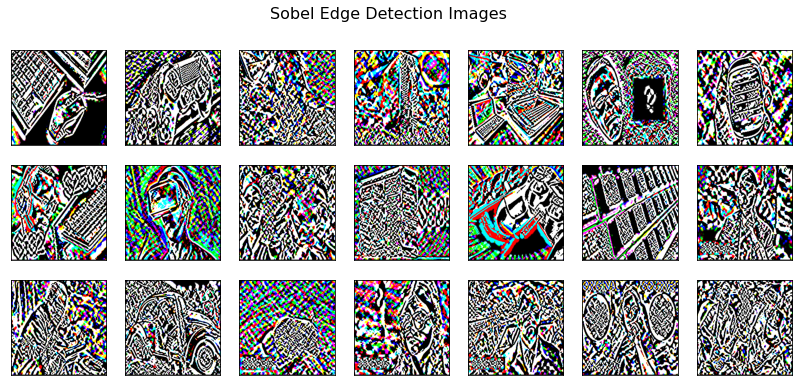

In [227]:
visualize_images(X_sobel[100:122],"Sobel Edge Detection")

##### Logistic Regression

In [203]:
lrc.fit(X_train_sobel,  y_train_sobel)
evaluvate_model(lrc,X_test_sobel,y_test_sobel,"Sobel Edge & Logistic Regression")

---------------------Sobel Edge & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.75      0.54      0.63        79
           1       0.51      0.55      0.53       101
           2       0.66      0.49      0.56       123
           3       0.48      0.69      0.57        75
           4       0.33      0.52      0.40        83
           5       0.17      0.43      0.25        72

   micro avg       0.42      0.53      0.47       533
   macro avg       0.48      0.54      0.49       533
weighted avg       0.50      0.53      0.50       533
 samples avg       0.41      0.50      0.43       533



##### SVC

In [27]:
svc.fit(X_train_bilateral_blur,  y_train_bilateral_blur)
evaluvate_model(svc,X_test_bilateral_blur,y_test_bilateral_blur,"Sobel Edge & SVC")

---------------------Sobel Edge & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.96      0.30      0.46        79
           1       1.00      0.28      0.43       101
           2       0.95      0.17      0.29       123
           3       1.00      0.16      0.28        75
           4       0.60      0.11      0.18        83
           5       1.00      0.03      0.05        72

   micro avg       0.92      0.18      0.30       533
   macro avg       0.92      0.17      0.28       533
weighted avg       0.92      0.18      0.29       533
 samples avg       0.16      0.15      0.15       533



#####  Ada Boost

In [28]:
adb.fit(X_train_bilateral_blur,  y_train_bilateral_blur)
evaluvate_model(adb,X_test_bilateral_blur,y_test_bilateral_blur,"Sobel Edge & Ada Boost")

---------------------Sobel Edge & Ada Boost Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.68      0.32      0.43        79
           1       0.39      0.28      0.32       101
           2       0.40      0.28      0.33       123
           3       0.25      0.24      0.24        75
           4       0.29      0.11      0.16        83
           5       0.26      0.12      0.17        72

   micro avg       0.37      0.23      0.28       533
   macro avg       0.38      0.22      0.28       533
weighted avg       0.38      0.23      0.28       533
 samples avg       0.21      0.21      0.21       533



#### 4.6.1 Sobel Edge Detection - Comparison

<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Current Best Result </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 55% </td>

</tr>
<tr>
<td> SVC </td>
<td> 38% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 39% </td>
</tr>
</table>


<table>
<caption style = "text-align:Center;color:black; font-weight:bold"> Sobel Edge Detection </caption>
<th> Model </th>
<th> Weighted F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 50% </td>

</tr>
<tr>
<td> SVC </td>
<td> 29% </td>

</tr>
<tr>
<td> Ada Boost </td>
<td> 28% </td>
</tr>
</table>


The performance of all 3 models deteriorated. Hence, I will not be using Sobel Edge Detection as part of the preprocessing steps.

## 4.7 Summary of Preprocessing 

Therefore, I have proven that different preprocessing steps can significantly affect the performance of the model. Thus the final image preprocessing steps are:
<ol>
<li>Resize Image to 256 by 256</li>
<li> Gamma correction, where value of gamma is 1.1. Hence, the brightness of the images are increased
<li> Blurring using Bilateral Filter </li>
<li> Removal of Unecessary Columns - Although the column channel and Id is unecessary, it is required to access the images from the images file. Hence they were not removed but they were excluded in the training and testing datasets
<li> Normalizing pixels by dividing them by 255
</ol>

Note: Grayscale processing is a common and useful step for image preprocessing as it reduces the dimensionality of the images. However, I did not grayscale the images due to one of the feature extraction methods requiring the image to be coloured. Thus, to ensure a fair comparison of models on the same images, I did not grayscale the images.
        

## 5. Feature Extraction + Modelling

The image feature extraction used are:
<ol>
<li><b> Histogram of Oriented Gradients </b> is a feature descriptor.  It focuses on the structure or the shape of an object and it is able to provide the edge direction as well. This is done by extracting the gradient and orientation of the edges.Additionally, these orientations are calculated in ‘localized’ portions. This means that the complete image is broken down into smaller regions and for each region, the gradients and orientation are calculated. We will discuss this in much more detail in the upcoming sections. Finally the HOG would generate a Histogram for each of these regions separately. The histograms are created using the gradients and orientations of the pixel values. </li><br><br>

<li> <b>Scale Invariant Feature Transform</b> is invariant to scale and orientation of images and robust to illumination fluctuations, noise, partial occlusion, and minor viewpoint changes in the images. The SIFT feature is composed of several key points in the image with an orientation and the corresponding descriptor of the area around the selected key points. SIFT key points are searched through different image scales, known as the Difference of Gaussian pyramid. Key points are selected by picking local maxima points in the 3D neighborhood of the image scale pyramid. For each key point, the dominant orientation is determined to achieve rotation invariance. SIFT descriptors are calculated as a histogram of image gradients around key points to characterize the local appearance of each selected key point. </li><br><br>

<li> <b>Transsfer Learning using VGGNet-16 </b> also known as Visual Geometry Group, which belongs to the Department of Science and Engineering of Oxford University. It has released a series of convolutional network models beginning with VGG, which can be applied to face recognition and image classification. The input of VGG is set to an RGB image of 224x244 size. The average RGB value is calculated for all images on the training set image, and then the image is input as an input to the VGG convolution network. VGG16 contains 16 layers. Thus, I will be using this pre tained model is a feature extractor and use the output on the machine learning models. This is because, machine learning models are unabl to extract features unlike deep learning models such as CNN. Furthermore, methods such as HOG and SIFT may not be effective. Thus, using a pretrained CNN model for feature extraction may provide better results.</li>
</ol><br>
    
References: https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/#:~:text=HOG%2C%20or%20Histogram%20of%20Oriented,vision%20tasks%20for%20object%20detection.
    https://www.sciencedirect.com/topics/computer-science/scale-invariant-feature-transform
    https://www.kaggle.com/code/blurredmachine/vggnet-16-architecture-a-complete-guide/notebook
    https://www.quora.com/How-can-I-train-a-SVM-model-using-features-from-CNN-in-Keras

### Methodology

These will be the steps that I will follow to evaluvate the models:

<ol>
    <li> Perform feature extraction to obtain different image features </li>
    <li> Train, test and evaluvate models on each text representation </li> 
    <li> Perform grid search with cross valiation on all models to identify the best parameters for all the models to tune the model and enhance its performance </li>
    <li> Revaluvate the model </li>
    <li> Analyse performance of all model - feature extraction combinations to identify best performing model & its respective feature extraction performed </li>
    

Note: The grid search paramter grids for each model will be explained under 5.1. The same grid search parameter grid will be used for all other models. 

### 5.1 Histogram of Oriented Gradients

In [47]:
def hog_images():
    hog_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, 1.1)
        image = cv2.bilateralFilter(image,9,75,75)
        fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
        hog_images.append(hog_image.flatten())
        
    X,y,X_train, X_test, y_train, y_test = preprocess_data(hog_images)
    return X,y,X_train, X_test, y_train, y_test

In [48]:
X_hog,y_hog,X_train_hog, X_test_hog, y_train_hog, y_test_hog = hog_images()

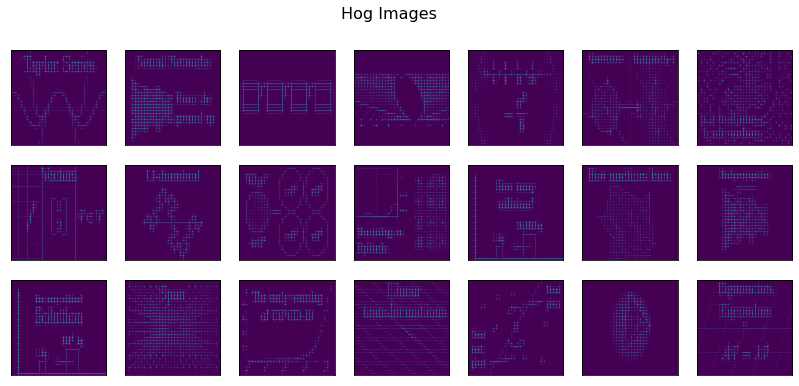

In [42]:
fig = plt.figure(figsize=(14, 6))
fig.patch.set_facecolor('white')
fig.suptitle(("{} Images").format("Hog"),fontsize=16)
for i in range(21):
    plt.subplot(3, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_hog.iloc[i].values.reshape(256,256)) 
plt.show()

#### 5.1.1 Logistic Regression 

##### Logistic Regression - Before Tuning

In [29]:
lrc.fit(X_train_hog,  y_train_hog)
evaluvate_model(lrc,X_test_hog,y_test_hog,"HOG & Logistic Regression")

---------------------HOG & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.77      0.56      0.65        79
           1       0.76      0.51      0.62       101
           2       0.70      0.46      0.56       123
           3       0.86      0.43      0.57        75
           4       0.54      0.31      0.40        83
           5       0.34      0.18      0.24        72

   micro avg       0.68      0.42      0.52       533
   macro avg       0.66      0.41      0.50       533
weighted avg       0.67      0.42      0.52       533
 samples avg       0.39      0.39      0.38       533



In [2]:
cross_validate_model(lrc,X_hog,y_hog,"HOG with Logistic Regression Before Tuning ")

HOG with Logistic Regression Before Tuning  Mean Cross Validation F1-Score:52.178%
HOG with Logistic Regression Before Tuning  Mean Cross Validation Recall:42.912%
HOG with Logistic Regression Before Tuning  Mean Cross Validation Precision:67.443%


The model is poor performing. The Recall is very low with a score of 42.912% and its Precision is also low with a score of 67.443%. Hence the F1 is a averaged out to 55.1775%. Hence, there is likely more False Negatives than False Positives.

    
Based on the classficiant report, the model is performing averagely based on precision across most classes. However, it is performing extremely poor based on recall acrosss all classes. Due to the poor recall, the f1 score is pulled down.

Hence, I will perform grid search to tune the model and check if that would improve the recall.

##### Logistic Regression - Grid Search CV

In [8]:
#set parameter grid
lrc_gridsearch_param_grid = {
    'estimator__solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], #Algorithm to use in the optimization problem.
    "estimator__C": [100, 10, 1.0, 0.1, 0.01],  #Inverse of regularization strength
    "estimator__penalty":["l1","l2","elasticnet","none"], #norm of the penalty:
    "estimator__max_iter":[100, 200, 300] #Maximum number of iterations taken for the solvers to converge.
        }

In [9]:
print("Logistic Regression Classification - Grid Search Parameter grid:")
lrc_gridsearch_param_grid

Logistic Regression Classification - Grid Search Parameter grid:


{'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'estimator__C': [100, 10, 1.0, 0.1, 0.01],
 'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'estimator__max_iter': [100, 200, 300]}

In [40]:
lrc_hog_gridsearch_cv = GridSearchCV(estimator = lrc, param_grid = lrc_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_weighted")
#scoring used as f1_score as it is the most important metric in this classification problem
lrc_hog_gridsearch_cv.fit(X_train_hog,y_train_hog)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=LogisticRegression(n_jobs=-1)),
             n_jobs=-1,
             param_grid={'estimator__C': [100, 10, 1.0, 0.1, 0.01],
                         'estimator__max_iter': [100, 200, 300],
                         'estimator__penalty': ['l1', 'l2', 'elasticnet',
                                                'none'],
                         'estimator__solver': ['newton-cg', 'lbfgs',
                                               'liblinear', 'sag', 'saga']},
             scoring='f1_weighted', verbose=2)

In [41]:
print("Logistic Regression Classifier Best Parameters from Grid Search with Cross Validation are: \n")
print(lrc_hog_gridsearch_cv.best_params_)

Logistic Regression Classifier Best Parameters from Grid Search with Cross Validation are: 

{'estimator__C': 0.01, 'estimator__max_iter': 300, 'estimator__penalty': 'none', 'estimator__solver': 'sag'}


##### Logistic Regression - After Tuning

In [49]:
#run model with best paramteres obtained from grid search
lrc_hog_final = MultiOutputClassifier(estimator=LogisticRegression(solver="sag",penalty="none",C=0.01,max_iter=300))
lrc_hog_final.fit(X_train_hog,y_train_hog)
evaluvate_model(lrc_hog_final,X_test_hog,y_test_hog," HOG with Logistic Regression Classifier After Tuning")

--------------------- HOG with Logistic Regression Classifier After Tuning Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        79
           1       0.72      0.53      0.61       101
           2       0.65      0.47      0.55       123
           3       0.83      0.45      0.59        75
           4       0.53      0.35      0.42        83
           5       0.30      0.18      0.23        72

   micro avg       0.64      0.44      0.52       533
   macro avg       0.63      0.42      0.51       533
weighted avg       0.64      0.44      0.52       533
 samples avg       0.40      0.40      0.39       533



In [5]:
cross_validate_model(lrc_hog_final,X_hog,y_hog,"HOG with Logistic Regression After Tuning ")

HOG with Logistic Regression After Tuning  Mean Cross Validation F1-Score:53.348%
HOG with Logistic Regression After Tuning  Mean Cross Validation Recall:44.528%
HOG with Logistic Regression After Tuning  Mean Cross Validation Precision:65.782%


After tuning the performance of the model did not improve greatly. The recall increased by 1.616% to 44.528% and the precision decreased by 1.661% to 65.782% This could be due to a small increase in False Positives, and reduce in False Negatives.

The classification report shows that the model is performing averagely based on precision on some classes. The model is still performing poor across all classes based on recall. <br>


Althouh the precision, recall and f1-score are below 80% across all classes, the classes with the poorest performance are:
<ul>
    <li> Poor Precision - All except class 4,5 as the precisions are below 60% </li>
    <li> Poor Recall - 2,3,4,5 as the recall are below 60%  </li>
    <li> Poor F1-score - 2,3,4,5 as the f1-scores are below 60% </li>
    </ul>
    
 Overall, the model is considered to be very poor perfoming. Its overall performance, and performance on each class is poor. 

#### 5.1.2 SVC

##### SVC - Before Tuning

In [30]:
svc.fit(X_train_hog,  y_train_hog)
evaluvate_model(svc,X_test_hog,y_test_hog,"HOG & SVC")

---------------------HOG & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.97      0.44      0.61        79
           1       0.94      0.44      0.59       101
           2       0.97      0.30      0.46       123
           3       0.97      0.40      0.57        75
           4       0.89      0.10      0.17        83
           5       0.00      0.00      0.00        72

   micro avg       0.96      0.29      0.44       533
   macro avg       0.79      0.28      0.40       533
weighted avg       0.82      0.29      0.42       533
 samples avg       0.26      0.25      0.26       533



In [6]:
cross_validate_model(svc,X_hog,y_hog,"HOG with SVC Before Tuning")

HOG with SVC Before Tuning Mean Cross Validation F1-Score:42.209%
HOG with SVC Before Tuning Mean Cross Validation Recall:29.356%
HOG with SVC Before Tuning Mean Cross Validation Precision:82.063%


The model is poor performing. It is perofrming worse than logistic regression and The Recall is very low with a score of 29.356% but its Precision is high with a score of 82.063%. Hence the F1 is a averaged out to 42.209%. Hence, there is likely more False Negatives than False Positives. 

  
Based on the classficiant report, the model is performing extremely well based on precision across most classes. However, it is performing extremely poor based on recall acrosss all classes. Due to the poor recall, the f1 score is pulled down.

Another interesting discovery is that the model is unable to predict class 5 at all. Despite multiple attempts at rerunning the model, it still displays 0 for recall, precision and f1 score.

Hence, I will perform grid search to tune the model and check if that would improve the recall and the models' ability to predict class 5

##### SVC - Grid Search CV

In [6]:
SVC_gridsearch_param_grid = {
    'estimator__C': [0.1,1, 10, 100], #Regularization parameter. The strength of the regularization is inversely proportional to C. 
    'estimator__gamma': [1,0.1,0.01,0.001], #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    'estimator__kernel': ['rbf', 'poly', 'sigmoid',"linear","precomputed"] #Specifies the kernel type to be used in the algorithm.
}

In [7]:
print("SVC - Grid Search Parameter grid:")
SVC_gridsearch_param_grid

SVC - Grid Search Parameter grid:


{'estimator__C': [0.1, 1, 10, 100],
 'estimator__gamma': [1, 0.1, 0.01, 0.001],
 'estimator__kernel': ['rbf', 'poly', 'sigmoid', 'linear', 'precomputed']}

In [42]:
svc_hog_gridsearch_cv = GridSearchCV(estimator = svc, param_grid = SVC_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_weighted")
#scoring used as f1_score as it is the most important metric in this classification problem
svc_hog_gridsearch_cv.fit(X_train_hog,y_train_hog)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=MultiOutputClassifier(estimator=SVC()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 1, 10, 100],
                         'estimator__gamma': [1, 0.1, 0.01, 0.001],
                         'estimator__kernel': ['rbf', 'poly', 'sigmoid',
                                               'linear', 'precomputed']},
             scoring='f1_weighted', verbose=2)

In [43]:
print("SVC Best Parameters from Grid Search with Cross Validation are: \n")
print(svc_hog_gridsearch_cv.best_params_)

SVC Best Parameters from Grid Search with Cross Validation are: 

{'estimator__C': 100, 'estimator__gamma': 0.001, 'estimator__kernel': 'rbf'}


In [50]:
#run model with best paramteres obtained from grid search
svc_hog_final = MultiOutputClassifier(estimator=SVC(C=100,gamma=0.001,kernel="rbf"))
svc_hog_final.fit(X_test_hog,y_test_hog)
evaluvate_model(svc_hog_final,X_train_hog,y_train_hog,"SVC with HOG After Tuning")

---------------------SVC with HOG After Tuning Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.67      0.57      0.62       189
           1       0.68      0.44      0.53       205
           2       0.54      0.47      0.50       285
           3       0.74      0.54      0.62       145
           4       0.35      0.50      0.41       196
           5       0.41      0.30      0.35       188

   micro avg       0.53      0.47      0.50      1208
   macro avg       0.56      0.47      0.50      1208
weighted avg       0.55      0.47      0.50      1208
 samples avg       0.41      0.45      0.42      1208



In [51]:
cross_validate_model(svc_hog_final,X_hog,y_hog,"HOG with SVC After Tuning")

HOG with SVC After Tuning Mean Cross Validation F1-Score:50.128%
HOG with SVC After Tuning Mean Cross Validation Recall:48.908%
HOG with SVC After Tuning Mean Cross Validation Precision:55.607%


After tuning the performance of the model improved greatly. The recall  and precision balanced out to 48.908% and 55.607% respectively. Thus, the f1-score increased to 53.128%. This suggests that there was an increase in False Positives, and reduction in False Negatives.

However, the improvement was not signigicant enough to consider the model to be well performinh. Based on the classification report shows that the model is performing averagely based on precision and recall across all classes. The recall is worse than the precision. None of the classes have a precision, recall or f1 score above 80% <br>

However, after tuning the model is able to predict class 5 with decent results in comparsion to other classes
    
 Overall, the model is considered to be very poor perfoming. 

#### 5.1.3 Ada Boost

#####  Ada Boost - Before Tuning

In [55]:
adb_hog = MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm="SAMME",n_estimators=200,learning_rate=1))
adb_hog.fit(X_train_hog,  y_train_hog)
evaluvate_model(adb_hog,X_test_hog,y_test_hog,"Ada Boost with HOG")

---------------------Ada Boost with HOG Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.57      0.35      0.44        79
           1       0.58      0.41      0.48       101
           2       0.48      0.37      0.42       123
           3       0.54      0.20      0.29        75
           4       0.42      0.10      0.16        83
           5       0.39      0.10      0.16        72

   micro avg       0.52      0.27      0.36       533
   macro avg       0.50      0.25      0.32       533
weighted avg       0.50      0.27      0.34       533
 samples avg       0.25      0.24      0.24       533



In [56]:
cross_validate_model(adb,X_hog,y_hog,"HOG with Ada Boost Before Tuning")

HOG with Ada Boost Before Tuning Mean Cross Validation F1-Score:35.735%
HOG with Ada Boost Before Tuning Mean Cross Validation Recall: 26.023%
HOG with Ada Boost Before Tuning Mean Cross Validation Precision: 50.073%


The model is poor performing. It is perofrming better than SVC but worse than logistic regression. The Recall is very low with a score of 26.023% but its Precision is higher with a score of 50.073%. Hence the F1 is a averaged out to 35.735%. Hence, there is likely more False Negatives than False Positives. 

Based on the classficiant report, the model is performing poorly based on precision and recall across most classes. However, it is performing even worse on recall than precision acrosss all classes. Due to the poor recall, the f1 score is pulled down.

Hence, I will perform grid search to tune the model and check if that would improve the overall performance of the model

#####  Ada Boost - Grid Search CV

In [21]:
adaboost_gridsearch_param_grid={
    'estimator__n_estimators':[200,400,600],
    'estimator__learning_rate':[.001,0.01,0.1,1],
    'estimator__algorithm': ["SAMME", "SAMME.R"]
}

In [22]:
print("Ada Boost - Grid Search Parameter grid:")
adaboost_gridsearch_param_grid

Ada Boost - Grid Search Parameter grid:


{'estimator__n_estimators': [200, 400, 600],
 'estimator__learning_rate': [0.001, 0.01, 0.1, 1],
 'estimator__algorithm': ['SAMME', 'SAMME.R']}

In [44]:
adb_hog_gridsearch_cv = GridSearchCV(estimator = adb, param_grid = adaboost_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_weighted")
adb_hog_gridsearch_cv.fit(X_train_hog,y_train_hog)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=AdaBoostClassifier()),
             n_jobs=-1,
             param_grid={'estimator__algorithm': ['SAMME', 'SAMME.R'],
                         'estimator__learning_rate': [0.001, 0.01, 0.1, 1],
                         'estimator__n_estimators': [200, 400, 600]},
             scoring='f1_weighted', verbose=2)

In [45]:
print("Ada Boost Classifier Best Parameters from Grid Search with Cross Validation are: \n")
print(adb_hog_gridsearch_cv.best_params_)

Ada Boost Classifier Best Parameters from Grid Search with Cross Validation are: 

{'estimator__algorithm': 'SAMME', 'estimator__learning_rate': 1, 'estimator__n_estimators': 200}


#####  Ada Boost - After Tuning

In [54]:
#run model with best paramteres obtained from grid search
adb_hog_final = MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm="SAMME",n_estimators=200,learning_rate=1))
adb_hog_final.fit(X_train_hog,  y_train_hog)
evaluvate_model(adb_hog_final,X_test_hog,y_test_hog,"HOG & Ada Boost Classifier After Tuning")

---------------------HOG & Ada Boost Classifier After Tuning Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.49      0.46      0.47        79
           1       0.52      0.45      0.48       101
           2       0.53      0.41      0.46       123
           3       0.46      0.23      0.30        75
           4       0.73      0.13      0.22        83
           5       0.26      0.14      0.18        72

   micro avg       0.49      0.32      0.39       533
   macro avg       0.50      0.30      0.35       533
weighted avg       0.50      0.32      0.37       533
 samples avg       0.28      0.29      0.28       533



In [57]:
cross_validate_model(adb_hog_final,X_hog,y_hog,"HOG with Ada Boost Before Tuning")

HOG with Ada Boost Before Tuning Mean Cross Validation F1-Score:37.996%
HOG with Ada Boost Before Tuning Mean Cross Validation Recall:32.284%
HOG with Ada Boost Before Tuning Mean Cross Validation Precision:51.733%


After tuning the performance of the model did not improve greatly. The recall increased by 6.261% to 32.284%. The preciesion increased by 1.66% to 51.733%. Thus, the f1-score increased by 2.261% to 37.996%

The improvement was not signigicant enough to consider the model to be well performing. Based on the classification report shows that the model is performing poor based on precision and recall across all classes. The recall is worse than the precision. None of the classes have a precision, recall or f1 score above 80% <br>
   
 Overall, the model is considered to be very poor perfoming. 

#### 5.1.4 Summary of Results 

<table>
<th> Model </th>
<th> Precision </th>
<th> Recall </th>
<th> F1 </th>
<th> Performance Across Classes </th>
<tr>
<td> Logistic Regression </td>
<td>65.782% </td>
<td>44.528% </td>
<td>53.348% </td>
<td> F1-score below 65% across all classes </td>
</tr>
<tr>
<td> SVC </td>
<td>55.607% </td>
<td>48.908% </td>
<td>50.128% </td>
<td> F1-score below 65% across all classes  </td>
</tr>
<tr>
<td> Ada Boost </td>
<td>37.996% </td>
<td>38.284% </td>
<td>37.996% </td>
<td> F1-score below 50% across all classes  </td>
</tr>
</table>

Although the performance of all 3 models are poor, out of these models, the model that best performs when HOG is applied to extract the image features is logistic regression. The performance of SVC and logistic regression is similar  based on recall and f1. But the precision of logistic regression is higher thus giving a slightly higher f1 score compared to SVC. Thus, I choose Logistic Regression when the feature extraction performed is HOG

### 5.2 Scale Invariant Feature Transform

In [15]:
def sift_images():
    sift_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, 1.1)
        image = cv2.bilateralFilter(image,9,75,75)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        gray = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(image, None)
        if keypoints != None:
            sift_image = cv2.drawKeypoints(gray, keypoints, image)
        sift_images.append(sift_image.flatten())
        
    X,y,X_train, X_test, y_train, y_test = preprocess_data(sift_images)
    return X,y,X_train, X_test, y_train, y_test

In [16]:
X_sift,y_sift,X_train_sift, X_test_sift, y_train_sift, y_test_sift = sift_images()

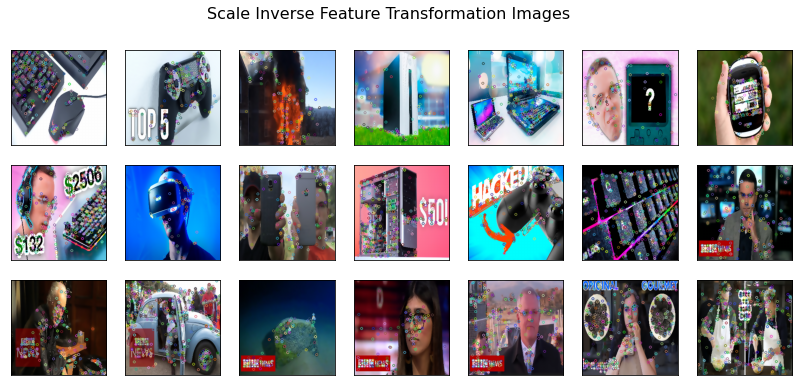

In [44]:
visualize_images(X_sift[100:122],"Scale Inverse Feature Transformation")

#### 5.2.1 Logistic Regression

#### Logistic Regresion - Before Tuning

In [49]:
lrc.fit(X_train_sift,  y_train_sift)
evaluvate_model(lrc,X_test_sift,y_test_sift,"SIFT & Logistic Regression")

---------------------SIFT & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.83      0.44      0.58        79
           1       0.74      0.46      0.56       101
           2       0.65      0.43      0.52       123
           3       0.80      0.53      0.64        75
           4       0.46      0.23      0.31        83
           5       0.44      0.28      0.34        72

   micro avg       0.66      0.40      0.50       533
   macro avg       0.66      0.39      0.49       533
weighted avg       0.66      0.40      0.50       533
 samples avg       0.38      0.37      0.37       533



In [1]:
cross_validate_model(lrc,X_sift,y_sift,"SIFT with Logistic Regression Before Tuning")

SIFT with Logistic Regression Before Tuning Mean Cross Validation F1-Score:50.106%
SIFT with Logistic Regression Before Tuning Mean Cross Validation Recall:40.927%
SIFT with Logistic Regression Before Tuning Mean Cross Validation Precision:66.163%


The model is poor performing. The Recall is very low with a score of 40.927% and its Precision is also low with a score of 66.163%. Hence the F1 is a averaged out to 55.1775%. Hence, there is likely more False Negatives than False Positives.

    
Based on the classficiant report, the model is performing averagely based on precision across most classes. However, it is performing extremely poor based on recall acrosss all classes. Due to the poor recall, the f1 score is pulled down.

Hence, I will perform grid search to tune the model and check if that would improve the recall.

#### Logistic Regresion - Grid Search CV

In [46]:
lrc_sift_gridsearch_cv = GridSearchCV(estimator = lrc, param_grid = lrc_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_weighted")
#scoring used as f1_score as it is the most important metric in this classification problem
lrc_sift_gridsearch_cv.fit(X_train_sift,y_train_sift)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=LogisticRegression(n_jobs=-1)),
             n_jobs=-1,
             param_grid={'estimator__C': [100, 10, 1.0, 0.1, 0.01],
                         'estimator__max_iter': [100, 200, 300],
                         'estimator__penalty': ['l1', 'l2', 'elasticnet',
                                                'none'],
                         'estimator__solver': ['newton-cg', 'lbfgs',
                                               'liblinear', 'sag', 'saga']},
             scoring='f1_weighted', verbose=2)

In [47]:
print("Logistic Regression Classifier Best Parameters from Grid Search with Cross Validation are: \n")
print(lrc_sift_gridsearch_cv.best_params_)

Logistic Regression Classifier Best Parameters from Grid Search with Cross Validation are: 

{'estimator__C': 10, 'estimator__max_iter': 100, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}


#### Logistic Regresion - After Tuning

In [50]:
#run model with best paramteres obtained from grid search
lrc_sift_final = MultiOutputClassifier(estimator=LogisticRegression(solver="lbfgs",penalty="l2",C=10,max_iter=100))
lrc_sift_final.fit(X_train_sift,y_train_sift)
evaluvate_model(lrc_sift_final,X_test_sift,y_test_sift," SIFT with Logistic Regression Classifier After Tuning")

--------------------- SIFT with Logistic Regression Classifier After Tuning Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        79
           1       0.59      0.58      0.59       101
           2       0.60      0.50      0.54       123
           3       0.80      0.55      0.65        75
           4       0.45      0.27      0.33        83
           5       0.37      0.32      0.34        72

   micro avg       0.60      0.46      0.52       533
   macro avg       0.61      0.45      0.51       533
weighted avg       0.61      0.46      0.52       533
 samples avg       0.41      0.42      0.41       533



In [2]:
cross_validate_model(lrc_sift_final,X_sift,y_sift,"SIFT with Logistic Regression After Tuning")

SIFT with Logistic Regression After Tuning Mean Cross Validation F1-Score:52.581%
SIFT with Logistic Regression After Tuning Mean Cross Validation Recall:46.016%
SIFT with Logistic Regression After Tuning Mean Cross Validation Precision:61.163%


After tuning the performance of the model improved. The recall and precision balanced out to 46.016% and 61.163% respectively. Thus the f1-score improved by 2.475% to 52.581%. Hence, the False Negatives have decreased and False Positives have increased.

The improvement was not signigicant enough to consider the model to be well performing. Based on the classification report shows that the model is performing poor based on precision across most classes and recall is performig poorly across all classes. The recall is worse than the precision. None of the classes have a precision, recall or f1 score above 80% <br>
   
Overall, the model is considered to be very poor perfoming. 

#### 5.2.2 SVC

##### SVC - Before Tuning

In [51]:
svc.fit(X_train_sift,  y_train_sift)
evaluvate_model(svc,X_test_sift,y_test_sift,"SIFT & SVC")

---------------------SIFT & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.95      0.27      0.42        79
           1       1.00      0.23      0.37       101
           2       0.95      0.15      0.25       123
           3       1.00      0.13      0.24        75
           4       0.60      0.11      0.18        83
           5       1.00      0.04      0.08        72

   micro avg       0.91      0.16      0.27       533
   macro avg       0.92      0.15      0.26       533
weighted avg       0.92      0.16      0.26       533
 samples avg       0.14      0.13      0.13       533



In [3]:
cross_validate_model(svc_sift_final,X_sift,y_sift,"SIFT with SVC Before Tuning")

SIFT with Logistic Regression Before Tuning Mean Cross Validation F1-Score: 26.894%
SIFT with Logistic Regression Before Tuning Mean Cross Validation Recall: 16.523%
SIFT with Logistic Regression Before Tuning Mean Cross Validation Precision: 93.042%


The model is poor performing. The Recall is extremely low with a score of 16.523% but the Precision is extremely high with a score of 93.042%. Hence the F1 is a averaged out to 26.894%. Hence, there is likely many False Negatives and few False Positives.

Based on the classficiant report, the model is performing very well based on precision across all classes. However, it is performing extremely poor based on recall acrosss all classes. Due to the poor recall, the f1 score is pulled down.

Hence, I will perform grid search to tune the model and check if that would improve the recall.

##### SVC - Grid Search CV

In [48]:
svc_sift_gridsearch_cv = GridSearchCV(estimator = svc, param_grid = SVC_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_weighted")
#scoring used as f1_score as it is the most important metric in this classification problem
svc_sift_gridsearch_cv.fit(X_train_sift,y_train_sift)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=MultiOutputClassifier(estimator=SVC()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 1, 10, 100],
                         'estimator__gamma': [1, 0.1, 0.01, 0.001],
                         'estimator__kernel': ['rbf', 'poly', 'sigmoid',
                                               'linear', 'precomputed']},
             scoring='f1_weighted', verbose=2)

In [49]:
print("SVC Best Parameters from Grid Search with Cross Validation are: \n")
print(svc_sift_gridsearch_cv.best_params_)

SVC Best Parameters from Grid Search with Cross Validation are: 

{'estimator__C': 0.1, 'estimator__gamma': 1, 'estimator__kernel': 'linear'}


##### SVC - After Tuning

In [60]:
#run model with best paramteres obtained from grid search
svc_sift_final = MultiOutputClassifier(estimator=SVC(C=0.1,gamma=1,kernel="linear"))
svc_sift_final.fit(X_test_sift,y_test_sift)
evaluvate_model(svc_sift_final,X_train_sift,y_train_sift,"SVC with SIFT After Tuning")

---------------------SVC with SIFT After Tuning Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.42      0.51      0.46       189
           1       0.36      0.54      0.43       205
           2       0.39      0.49      0.44       285
           3       0.37      0.58      0.45       145
           4       0.28      0.42      0.33       196
           5       0.32      0.31      0.31       188

   micro avg       0.36      0.47      0.41      1208
   macro avg       0.36      0.47      0.40      1208
weighted avg       0.36      0.47      0.40      1208
 samples avg       0.32      0.45      0.36      1208



In [5]:
cross_validate_model(svc_sift_final,X_sift,y_sift,"SIFT with Logistic Regression After Tuning")

SIFT with Logistic Regression After Tuning Mean Cross Validation F1-Score: 40.382%
SIFT with Logistic Regression After Tuning Mean Cross Validation Recall: 47.284%
SIFT with Logistic Regression After Tuning Mean Cross Validation Precision: 36.587%


After tuning the performance of the model improved. As the grid search metric is weighted f1_score, the grid search returned the optimal parameters for the highest f1_score. Thus, the recall and precision balanced out to 47.284% and 36.587% respectively. Thus the f1-score improved by 13.488% to 40.382%. Hence, the False Negatives have decreased and False Positives have increased.

The improvement was not signigicant enough to consider the model to be well performing. Based on the classification report shows that the model is performing poor based on precision and recall across all classes. None of the classes have a precision, recall or f1 score above 80% <br>
   
Overall, the model is considered to be very poor perfoming. 

####  5.2.3 Ada Boost 

#####  Ada Boost - Before Tuning

In [48]:
adb.fit(X_train_sift,  y_train_sift)
evaluvate_model(adb,X_test_sift,y_test_sift,"SIFT & Ada Boost Classifier")

---------------------HOG & Ada Boost Classifier Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.25      0.06      0.10        79
           1       0.53      0.47      0.49       101
           2       0.37      0.24      0.29       123
           3       0.46      0.17      0.25        75
           4       0.27      0.23      0.25        83
           5       0.41      0.15      0.22        72

   micro avg       0.39      0.23      0.29       533
   macro avg       0.38      0.22      0.27       533
weighted avg       0.38      0.23      0.28       533
 samples avg       0.22      0.21      0.20       533



In [1]:
cross_validate_model(adb,X_sift,y_sift,"SIFT with Ada Boost After Tuning")

SIFT with Ada Boost Before Tuning Mean Cross Validation F1-Score: 29.643%
SIFT with Ada Boost Before Tuning Mean Cross Validation Recall: 23.923%
SIFT with Ada Boost Before Tuning Mean Cross Validation Precision: 38.725%


The model is poor performing. The Recall is extremely low with a score of 23.923% but the Precision is also low with a score of 38.725%. Hence the F1 is a averaged out to 29.643%. 

Based on the classficiant report, the model is performing poor based on both precision and recall across all classes. 

Hence, I will perform grid search to tune the model and check if that would improve the overall performance of the model.

#####  Ada Boost - Grid Search CV

In [50]:
adb_sift_gridsearch_cv = GridSearchCV(estimator = adb, param_grid = adaboost_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_weighted")
adb_sift_gridsearch_cv.fit(X_train_sift,y_train_sift)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=AdaBoostClassifier()),
             n_jobs=-1,
             param_grid={'estimator__algorithm': ['SAMME', 'SAMME.R'],
                         'estimator__learning_rate': [0.001, 0.01, 0.1, 1],
                         'estimator__n_estimators': [200, 400, 600]},
             scoring='f1_weighted', verbose=2)

In [51]:
print("Ada Boost Classifier Best Parameters from Grid Search with Cross Validation are: \n")
print(adb_sift_gridsearch_cv.best_params_)

Ada Boost Classifier Best Parameters from Grid Search with Cross Validation are: 

{'estimator__algorithm': 'SAMME', 'estimator__learning_rate': 1, 'estimator__n_estimators': 600}


#####  Ada Boost - After Tuning

In [17]:
#run model with best paramteres obtained from grid search
adb_sift_final = MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm="SAMME",n_estimators=600,learning_rate=1))
adb_sift_final.fit(X_train_sift,  y_train_sift)
evaluvate_model(adb_sift_final,X_test_sift,y_test_sift,"Ada Boost After Tuning")

---------------------Ada Boost After Tuning Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.82      0.29      0.43        79
           1       0.70      0.30      0.42       101
           2       0.48      0.25      0.33       123
           3       0.75      0.20      0.32        75
           4       0.35      0.13      0.19        83
           5       0.55      0.17      0.26        72

   micro avg       0.59      0.23      0.33       533
   macro avg       0.61      0.22      0.32       533
weighted avg       0.60      0.23      0.33       533
 samples avg       0.23      0.20      0.21       533



In [2]:
cross_validate_model(adb_sift_final,X_sift,y_sift,"SIFT with Ada Boost After Tuning")

SIFT with Ada Boost After Tuning Mean Cross Validation F1-Score: 33.000%
SIFT with Ada Boost After Tuning Mean Cross Validation Recall: 23.712%
SIFT with Ada Boost After Tuning Mean Cross Validation Precision: 60.945%


After tuning the performance of the model improved. The precision improved greatly by 22.22% to 60.945%. However, the recall remain unchanged. Due to the significant increase in recall, the f1-score improved by 3.357%% to 33%. Hence, the False Positives are likely to have decreased 

The improvement was not signigicant enough to consider the model to be well performing. Based on the classification report shows that the model is performing poor based on precision acrosss most classes and recall across all classes. None of the classes have a recall or f1 score above 80% <br>
   
Overall, the model is considered to be very poor perfoming. 

#### 5.2.4 Summary of Results 

<table>
<th> Model </th>
<th> Precision </th>
<th> Recall </th>
<th> F1 </th>
<th> Performance Across Classes </th>
<tr>
<td> Logistic Regression </td>
<td>61.163% </td>
<td>46.016% </td>
<td>52.581% </td>
<td> F1-score 65% or below across all classes </td>
</tr>
<tr>
<td> SVC </td>
<td>36.587% </td>
<td>47.284% </td>
<td>40.382%% </td>
<td> F1-score below 50% across all classes  </td>
</tr>
<tr>
<td> Ada Boost </td>
<td>60.945% </td>
<td>23.712% </td>
<td>33% </td>
<td> F1-score below 45% across all classes  </td>
</tr>
</table>

Although the performance of all 3 models are poor, out of these models, the model that best performs when SIFT is applied to extract the image features is logistic regression. Logistic regression out performs the other models across all evaluvation metrics. Thus, it is the best model when the feature extraction method used is SIFT.

### 5.3 CNN VGG Net Feature Extraction

In [3]:
#referece:https://www.quora.com/How-can-I-train-a-SVM-model-using-features-from-CNN-in-Keras
def vgg_images():
    vgg_model = VGG16(weights='imagenet', include_top=False)  
    vgg_images = []
    for i in range(len(image_id_list)):
        image = load_img("images/{}/{}".format(channel_list[i],image_id_list[i]))
        image = img_to_array(image)
        image = cv2.resize(image, (256,256))
        image = np.power(image, 1.1)
        image = cv2.bilateralFilter(image,9,75,75)
        image = np.expand_dims(image, axis=0)  
        image = tf.keras.applications.resnet50.preprocess_input(image) 
        image = vgg_model.predict(image) 
        vgg_images.append(image.flatten())
    X,y,X_train, X_test, y_train, y_test = preprocess_data(vgg_images)
    return X,y,X_train, X_test, y_train, y_test

In [20]:
X_vgg,y_vgg,X_train_vgg, X_test_vgg, y_train_vgg, y_test_vgg = vgg_images()

1/1 [==============================] - 0s 12ms/step


#### 5.3.1 Logistic Regression

##### Logistic Regression - Before Tuning

In [38]:
lrc.fit(X_train_vgg,  y_train_vgg)
evaluvate_model(lrc,X_test_vgg,y_test_vgg,"CNN VGG Net Feature Extraction & Logistic Regression")

---------------------VGG Net & Logistic Regression Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        79
           1       0.95      0.62      0.75       101
           2       0.82      0.55      0.66       123
           3       0.86      0.33      0.48        75
           4       0.91      0.48      0.63        83
           5       0.96      0.62      0.76        72

   micro avg       0.89      0.56      0.69       533
   macro avg       0.90      0.56      0.68       533
weighted avg       0.89      0.56      0.68       533
 samples avg       0.56      0.54      0.55       533



In [10]:
cross_validate_model(lrc,X_vgg,y_vgg,"CNN VGG Net Feature Extraction & Logistic Regression")

CNN VGG Net with Logistic Regression Before Tuning Mean Cross Validation F1-Score: 68.783%
CNN VGG Net with Logistic Regression Before Tuning Mean Cross Validation Recall: 55.789%
CNN VGG Net with Logistic Regression Before Tuning Mean Cross Validation Precision:90.745%


The model is average performing. The Recall is  low with a score of 55.789% but the Precision is extremely high with a score of 90.745%. Hence the F1 is a averaged out to 68.783%. Hence, there is likely many False Negatives and few False Positives.

Based on the classficiant report, the model is performing very well based on precision across all classes. However, it is performing  poorly based on recall acrosss all classes. Due to the poor recall, the f1 score is pulled down.

However, the performance of the model is significantly better than the models when HOG & SIFT Feature extraction was used.

Hence, I will perform grid search to tune the model and check if that would improve the recall.

##### Logistic Regression - Grid Search CV

In [91]:
lrc_gridsearch_cv = GridSearchCV(estimator = lrc, param_grid = lrc_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_weighted")
#scoring used as f1_score as it is the most important metric in this classification problem
lrc_gridsearch_cv.fit(X_train_vgg,  y_train_vgg)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=LogisticRegression(n_jobs=-1)),
             n_jobs=-1,
             param_grid={'estimator__C': [100, 10, 1.0, 0.1, 0.01],
                         'estimator__max_iter': [100, 200, 300],
                         'estimator__penalty': ['l1', 'l2', 'elasticnet',
                                                'none'],
                         'estimator__solver': ['newton-cg', 'lbfgs',
                                               'liblinear', 'sag', 'saga']},
             scoring='f1_weighted', verbose=2)

In [92]:
print("Logistic Regression Classifier Best Parameters from Grid Search with Cross Validation are: \n")
print(lrc_vgg_gridsearch_cv.best_params_)

Logistic Regression Classifier Best Parameters from Grid Search with Cross Validation are: 

{'estimator__C': 100, 'estimator__max_iter': 100, 'estimator__penalty': 'none', 'estimator__solver': 'lbfgs'}


##### Logistic Regression - After Tuning

In [41]:
#run model with best paramteres obtained from grid search
lrc_vgg_final = MultiOutputClassifier(estimator=LogisticRegression(solver="lbfgs",penalty="none",C=100,max_iter=100))
lrc_vgg_final.fit(X_train_vgg,  y_train_vgg)
evaluvate_model(lrc_vgg_final,X_test_vgg,y_test_vgg,"Logistic Regression Classifier After Tuning")

---------------------Logistic Regression Classifier After Tuning Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        79
           1       0.92      0.68      0.78       101
           2       0.77      0.60      0.68       123
           3       0.77      0.40      0.53        75
           4       0.88      0.52      0.65        83
           5       0.94      0.71      0.81        72

   micro avg       0.85      0.61      0.71       533
   macro avg       0.85      0.61      0.71       533
weighted avg       0.85      0.61      0.71       533
 samples avg       0.60      0.60      0.59       533



In [13]:
cross_validate_model(lrc_vgg_final,X_vgg,y_vgg,"CNN VGG Net Feature Extraction & Logistic Regression After Tuning")

CNN VGG Net with Logistic Regression After Tuning Mean Cross Validation F1-Score: 71.365%
CNN VGG Net with Logistic Regression After Tuning Mean Cross Validation Recall: 61.245%
CNN VGG Net with Logistic Regression After Tuning Mean Cross Validation Precision: 86.723%


After tuning the performance of the model improved. The recall and precision balanced out to 61.245% and 86.723% respectively. Thus the f1-score improved by 2.582% to 71.365%. Hence, the False Negatives have decreased and False Positives have increased.

The improvement was not signigicant enough to consider the model to be well performing. Based on the classification report shows that the model is performing well based on precision across most classes and averagely based on recall across all classes. None of the classes have a recall above 80%. Only 1 class's f1 score is above 80%.  <br>
   
Overall, the model is considered to be average perfoming. However, the performance is much better compared to the previous model results

#### 5.3.2 SVC

##### SVC - Before Tuning

In [39]:
svc.fit(X_train_vgg,  y_train_vgg)
evaluvate_model(svc,X_test_vgg,y_test_vgg,"VGG Net & SVC")

---------------------VGG Net & SVC Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        79
           1       0.89      0.53      0.67       101
           2       0.77      0.58      0.66       123
           3       0.83      0.20      0.32        75
           4       0.90      0.34      0.49        83
           5       0.93      0.54      0.68        72

   micro avg       0.86      0.48      0.62       533
   macro avg       0.87      0.47      0.59       533
weighted avg       0.86      0.48      0.60       533
 samples avg       0.47      0.45      0.46       533



In [14]:
cross_validate_model(svc,X_vgg,y_vgg,"CNN VGG Net Feature Extraction & SVC Before Tuning")

CNN VGG Net with Logistic Regression Before Tuning Mean Cross Validation F1-Score: 59.384%
CNN VGG Net with Logistic Regression Before Tuning Mean Cross Validation Recall: 48.523%
CNN VGG Net with Logistic Regression Before Tuning Mean Cross Validation Precision: 86.678%


The model is average performing. The Recall is very low with a score of 48.523% but the Precision is high with a score of 86.678%. Hence the F1 is a averaged out to 59.384%. Hence, there is likely many False Negatives and fewer False Positives.

Based on the classficiant report, the model is performing very well based on precision across most classes. However, it is performing  poorly based on recall acrosss all classes. Due to the poor recall, the f1 score is pulled down.

However, the performance of the model is significantly better than the models when HOG & SIFT Feature extraction was used.

Hence, I will perform grid search to tune the model and check if that would improve the recall.

##### SVC - Grid Search CV

In [104]:
svc_gridsearch_cv = GridSearchCV(estimator = svc, param_grid = SVC_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_weighted")
svc_gridsearch_cv.fit(X_train_vgg,  y_train_vgg)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=MultiOutputClassifier(estimator=SVC()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 1, 10, 100],
                         'estimator__gamma': [1, 0.1, 0.01, 0.001],
                         'estimator__kernel': ['rbf', 'poly', 'sigmoid',
                                               'linear', 'precomputed']},
             scoring='f1_weighted', verbose=2)

In [105]:
print("SVC Best Parameters from Grid Search with Cross Validation are: \n")
print(svc_gridsearch_cv.best_params_)

SVC Best Parameters from Grid Search with Cross Validation are: 

{'estimator__C': 100, 'estimator__gamma': 0.001, 'estimator__kernel': 'sigmoid'}


In [133]:
#run model with best paramteres obtained from grid search
svc_vgg_final = MultiOutputClassifier(estimator=SVC(C=100,gamma=0.001,kernel="sigmoid"))
svc_vgg_final.fit(X_train_vgg,  y_train_vgg)
evaluvate_model(svc_vgg_final,X_test_vgg,y_test_vgg,"SVC After Tuning")

---------------------SVC After Tuning Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        79
           1       0.90      0.68      0.78       101
           2       0.79      0.61      0.69       123
           3       0.79      0.40      0.53        75
           4       0.84      0.51      0.63        83
           5       0.93      0.69      0.79        72

   micro avg       0.84      0.61      0.71       533
   macro avg       0.85      0.61      0.70       533
weighted avg       0.84      0.61      0.70       533
 samples avg       0.61      0.60      0.59       533



In [17]:
cross_validate_model(svc_vgg_final,X_vgg,y_vgg,"CNN VGG Net Feature Extraction & SVC After Tuning")

CNN VGG Net with SVC After Tuning Mean Cross Validation F1-Score: 70.000%
CNN VGG Net with SVC After Tuning Mean Cross Validation Recall: 61.283%
CNN VGG Net with SVC After Tuning Mean Cross Validation Precision: 84.126%


After tuning the performance of the model improved. The recall and precision balanced out to 61.283% and 84.126% respectively. Thus the f1-score improved by 10.616% to 70%. 

The improvement is very signigicant enough to consider the model to be well performing. Based on the classification report shows that the model is performing well based on precision across all classes and averagely based on recall across most classes. None of the classes have a recall and precision above 80%. <br>

However, the performance of the model is significantly better than the models when HOG & SIFT Feature extraction was used.
   
Overall, the model is considered to be average perfoming. However, the performance is much better compared to the previous model results

#### 5.3.3  Ada Boost

#####  Ada Boost - Before Tuning

In [40]:
adb.fit(X_train_vgg,  y_train_vgg)
evaluvate_model(adb,X_test_vgg,y_test_vgg,"VGG & Ada Boost Classifier")

---------------------VGG & Ada Boost Classifier Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.80      0.51      0.62        79
           1       0.66      0.44      0.52       101
           2       0.55      0.41      0.47       123
           3       0.59      0.29      0.39        75
           4       0.52      0.39      0.44        83
           5       0.58      0.54      0.56        72

   micro avg       0.61      0.43      0.50       533
   macro avg       0.62      0.43      0.50       533
weighted avg       0.61      0.43      0.50       533
 samples avg       0.41      0.41      0.40       533



In [18]:
cross_validate_model(adb,X_vgg,y_vgg,"CNN VGG Net Feature Extraction & Ada Boost Before Tuning")

CNN VGG Net with Ada Boost Before Tuning Mean Cross Validation F1-Score: 50.539%
CNN VGG Net with Ada Boost Before Tuning Mean Cross Validation Recall: 43.124%
CNN VGG Net with Ada Boost Before Tuning Mean Cross Validation Precision: 61.934%


The model is poor performing. The Recall is very low with a score of 43.124% but the Precision is low with a score of 61.934%. Hence the F1 is a averaged out to 50.539%. H

Based on the classficiant report, the model is performing avragely based on precision across most classes. However, it is performing  poorly based on recall acrosss all classes. Due to the poor recall, the f1 score is pulled down.

However, the performance of the model is significantly better than the models when HOG & SIFT Feature extraction was used.

Hence, I will perform grid search to tune the model and check if that would improve the recall.

#####  Ada Boost - Grid Search CV

In [23]:
adb_gridsearch_cv = GridSearchCV(estimator = adb, param_grid = adaboost_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_weighted")
adb_gridsearch_cv.fit(X_train_vgg,  y_train_vgg)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=AdaBoostClassifier()),
             n_jobs=-1,
             param_grid={'estimator__algorithm': ['SAMME', 'SAMME.R'],
                         'estimator__learning_rate': [0.001, 0.01, 0.1, 1],
                         'estimator__n_estimators': [200, 400, 600]},
             scoring='f1_weighted', verbose=2)

In [24]:
print("Ada Boost Classifier Best Parameters from Grid Search with Cross Validation are: \n")
print(adb_gridsearch_cv.best_params_)

Ada Boost Classifier Best Parameters from Grid Search with Cross Validation are: 

{'estimator__algorithm': 'SAMME.R', 'estimator__learning_rate': 1, 'estimator__n_estimators': 200}


#####  Ada Boost - After Tuning

In [26]:
#run model with best paramteres obtained from grid search
adb_vgg_final = MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm="SAMME.R",n_estimators=200,learning_rate=1))
adb_vgg_final.fit(X_train_vgg,  y_train_vgg)
evaluvate_model(adb_vgg_final,X_test_vgg,y_test_vgg,"Ada Boost After Tuning")

---------------------Ada Boost After Tuning Classification Report--------------------- 

              precision    recall  f1-score   support

           0       0.89      0.52      0.66        79
           1       0.67      0.57      0.62       101
           2       0.62      0.46      0.53       123
           3       0.62      0.27      0.37        75
           4       0.72      0.35      0.47        83
           5       0.59      0.53      0.56        72

   micro avg       0.67      0.46      0.54       533
   macro avg       0.69      0.45      0.53       533
weighted avg       0.68      0.46      0.54       533
 samples avg       0.43      0.43      0.42       533



In [19]:
cross_validate_model(adb_vgg_final,X_vgg,y_vgg,"CNN VGG Net Feature Extraction & Ada Boost After Tuning")

CNN VGG Net with Ada Boost After Tuning Mean Cross Validation F1-Score: 54.294%
CNN VGG Net with Ada Boost After Tuning Mean Cross Validation Recall: 45.320%
CNN VGG Net with Ada Boost After Tuning Mean Cross Validation Precision: 68.145%


After tuning the performance of the model improved slightly. The recall increased by 3.755% to 54.294% and the precision improved by 6.211% to 68.145%

The improvement is signigicant but not enough to consider the model to be average performing. Based on the classification report shows that the model is performing averagely based on precision across all classes and poorly based on recall across most classes. None of the classes have a recall and precision above 80%. As for precision, only one class has a precision above 80% <br>

However, the performance of the model is significantly better than the models when HOG & SIFT Feature extraction was used.
   
Overall, the model is considered to be poor perfoming. However, the performance is much better compared to the previous model results

#### 5.4.3 Summary of Results 

<table>
<th> Model </th>
<th> Precision </th>
<th> Recall </th>
<th> F1 </th>
<tr>
<td> Logistic Regression </td>
<td> 86.723% </td>
<td>61.245% </td>
<td>71.365% </td>
</tr>
<tr>
<td> SVC </td>
<td>84.126% </td>
<td>61.283% </td>
<td>70%</td>
</tr>
<tr>
<td> Ada Boost </td>
<td>68.145% </td>
<td>45.320% </td>
<td>54.294% </td>
</tr>
</table>

Although the performance of all 3 models are poor, out of these models, the model and feature extraction combination that performs best is Logistic Regression. It out performs or performs similarly to the other models across all metrics. Furthermore, since there is no specific requirement that the recall/precision is prefered, I used the f1 score to determine the selected model. Logistic Regression has the highest f1 score here. Hence, it is the best performing model when CNN VGG Net16 Feature Extraction is applied.

## 6. Selected Model & Feature Extraction Method

<table>
<th> Image Feature Extraction </th>
<th> Model </th>
<th> Precision </th>
<th> Recall </th>
<th> F1 </th>
<th> Performance Across Classes </th>
<tr>
<td> Histogram of Oriented Gradients </td>
<td> Logistic Regression </td>
<td>65.782% </td>
<td>44.528% </td>
<td>53.348% </td>
<td> F1-score: Below 65% <br> Recall: Below 56% <br> Precision: Below 70% in 3 classes </td>
</tr>
<tr>
<td> Scale Invariant Feature Transform </td>
<td> Logistic Regression </td>
<td>61.163% </td>
<td>46.016% </td>
<td>52.581% </td>
<td> F1-score: 65% or below <br> Recall: Below 60% <br> Precision: Below 70% in 4 classes </td>
</tr>
<tr>
<td> CNN VGGNet16 </td>
<td> Logistic Regression </td>
<td>86.723% </td>
<td>61.245% </td>
<td> 71.365% </td>
<td> F1-score: Below 70% in 3 classes <br> Recall: Below 65% in 3 classes <br> Precision: 77% or above across all classes </td>
</tr>
</table>

Surprisingly the best model across all 3 types of feature extraction is Logistic Regression. 

The best combination of feature extraction and model is <b>CNN VGG16 Feature Extraction + Logistic Regression</b>. One interesting discovery is that the precison is higher than the recall in all 3 models. The CNN VGG16 Feature Extraction + Logistic Regression combination out performs the other combinations significantly across all metrics. Hence, it would be the most suitable model for this image classification task.

However, the performance of the model is still not considered to be a well performing model as the recall and f1 score is well below 80%. Thus improvements need to be made to enhance the performance of the model.

## 7. Text Classification VS Image Classification

<table>
<th> Feature Extraction </th>
<th> Model </th>
<th> Precision </th>
<th> Recall </th>
<th> F1 </th>
<th> Performance Across Classes </th>
<tr>
<td> Word2Vec </td>
<td> SVC </td>
<td> 86.7% </td>
<td> 86% </td>
<td>86.1% </td>
<td> F1-score, recall and precision above 80% across all classes </td>
</tr>
<tr>
<td> CNN VGGNet16 </td>
<td> Logistic Regression </td>
<td>86.723% </td>
<td>61.245% </td>
<td> 71.365% </td>
<td> F1-score: Below 70% in 3 classes <br> Recall: Below 65% in 3 classes <br> Precision: 77% or above across all classes </td>
</tr>
</table>

For this dataset, the performance of text classification is significantly better than image classification. Text classification results outperforms the image classification results across all evaluvation metrics including the scores for each class. 

One interesting discovery is that both feature extractions were completed using pre trained models. Hence, it is likely that pre trained models would yield better results on this dataset.

Furthermore, the performance of the models in text classification were largely better than the performance  of the models in image classifcation.

Therefore, to predict the video category, text classification models are more suitable. The best combination of text representation and model would be <b> Word2Vec + SVC </b>